In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

from bokeh.plotting import figure, show, save
from bokeh.models import GeoJSONDataSource, ColumnDataSource, HoverTool
from bokeh.io import export_png
import matplotlib.pyplot as plt

import shapely

import sys

sys.path.append("../")

from Code.helper_functions import initial_loading
from Code.loading_data import load_api_data
from Code.algorithms import clusterwise_optimization

POSTGRES password?WelkomCorne!


In [ ]:
%time joined = clusterwise_optimization()

In [ ]:
import copy
joined2 = copy.deepcopy(joined)

In [2]:
all_households, rel_poi_df, joined, df_afstandn2 = initial_loading()

Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection(optional parameter)?
What is the maximum amount of containers in a cluster that is considered to be useful?8
Where to get db files(local/online)?local
DB relation POIs loaded


..\Code\loading_data.py:389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ligtin_bag_pnd_identificatie'] = \
..\Code\loading_data.py:397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten.loc[:, 'bag']\


distance matrix loaded
API data loaded
Table all households created
API and DB joined
containers per cluster determined
move_rest determined


In [ ]:
from Code.helper_functions import analyze_candidate_solution, add_shortest_distances_to_all_households, calculate_weighted_distance, calculate_penalties, calculate_simple_penalties
from Code.loading_data import create_aansluitingen

In [ ]:

joined_cluster_distance = joined2.set_index('s1_afv_nodes')\
        .join(df_afstandn2.set_index('van_s1_afv_nodes')).reset_index()\
        .rename(columns={'index': 'van_s1_afv_nodes'})


good_result = \
        add_shortest_distances_to_all_households(all_households,
                                                 joined_cluster_distance,
                                                 use_count=True)

# Cleaning step to deal with missing data
good_result['count'] = good_result['count'].fillna(0)
good_result = good_result[good_result['count'] > 0]
good_result[['poi_rest', 'poi_plastic', 'poi_papier', 'poi_glas',
             'poi_textiel']] = good_result[['poi_rest', 'poi_plastic',
                                            'poi_papier', 'poi_glas',
                                            'poi_textiel']].fillna(999)
good_result[['rest_afstand', 'plastic_afstand', 'papier_afstand',
             'glas_afstand', 'textiel_afstand']] = \
    good_result[['rest_afstand', 'plastic_afstand', 'papier_afstand',
                 'glas_afstand', 'textiel_afstand']].fillna(2000)

good_result.loc[~good_result['uses_container'],
                'rest_afstand'] = np.nan
good_result.loc[~good_result['uses_container'], 'poi_rest'] = np.nan

# Set distance of cardboard to nan is cardboard is collected there
good_result.loc[good_result['collect_cardboard'],
                'papier_afstand'] = np.nan
good_result.loc[good_result['collect_cardboard'],
                'poi_papier'] = np.nan

aansluitingen = create_aansluitingen(good_result,
                                     joined_cluster_distance,
                                     use_count=True)

avg_distance = calculate_weighted_distance(good_result,
                                           use_count=True,
                                           return_all=True)
penalties = calculate_penalties(good_result, aansluitingen,
                                use_count=True, return_all=True)

simple_penalties = calculate_simple_penalties(good_result, aansluitingen,
                                              use_count=True,
                                              return_all=True)





In [ ]:
good_result[good_result['textiel_afstand'] > 300]['count'].sum()

In [ ]:
analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=False, use_count=True, return_all=True, exclude_outliers=False)

In [ ]:
analyze_candidate_solution(joined2, all_households, rel_poi_df, df_afstandn2, clean=False, use_count=True, return_all=True, exclude_outliers=False)

Average distance is : 116.08608930901478
Penalties are: 60.05932817875248
Simple penalties are: 217339.18800000002
Average distance is : 138.78984628793094
Penalties are: 82.98701642593223
Simple penalties are: 251744.87000000002
Average distance is : 137.91574027625862
Penalties are: 81.92596005413125
Simple penalties are: 251276.771
Average distance is : 137.9662564445059
Penalties are: 81.71146918990647
Simple penalties are: 249699.78799999997
Average distance is : 135.32357058461693
Penalties are: 79.52538801823776
Simple penalties are: 251979.484
Average distance is : 136.141233739479
Penalties are: 80.37292369602487
Simple penalties are: 251966.526
Average distance is : 135.04873300373148
Penalties are: 79.0491274428337
Simple penalties are: 249823.586
Average distance is : 135.4897929168556
Penalties are: 79.4958638334784
Simple penalties are: 249168.918
Average distance is : 136.73176788523264
Penalties are: 80.75113834865458
Simple penalties are: 250772.452
Average distance is

Average distance is : 136.2084760329045
Penalties are: 80.16399285266952
Simple penalties are: 249649.25600000002
Average distance is : 137.82136327543697
Penalties are: 81.90620497850705
Simple penalties are: 250911.50299999997
Average distance is : 136.15372791966112
Penalties are: 80.21185243545541
Simple penalties are: 251879.25699999998
Average distance is : 138.82138802781557
Penalties are: 82.5915665958427
Simple penalties are: 251311.39499999996
Average distance is : 136.6413957964046
Penalties are: 80.8005939424998
Simple penalties are: 251096.858
Average distance is : 136.31114803580215
Penalties are: 80.34604072101315
Simple penalties are: 249427.959
Average distance is : 136.28307363150836
Penalties are: 80.09130591879155
Simple penalties are: 250533.797
Average distance is : 135.5703496402698
Penalties are: 79.29009697966816
Simple penalties are: 249610.939
Average distance is : 140.63401314970272
Penalties are: 84.46834042613554
Simple penalties are: 251058.49399999998
Av

Average distance is : 115.65575761549277
Penalties are: 59.59915231678933
Simple penalties are: 217631.509
59.59915231678933 59.59668294043569
Amount of clusters to change: 18
Average distance is : 115.65883807645947
Penalties are: 59.61340218571457
Simple penalties are: 217613.998
59.61340218571457 59.59668294043569
Amount of clusters to change: 24
Average distance is : 115.62214933962821
Penalties are: 59.572473957992365
Simple penalties are: 217529.466
59.572473957992365 59.59668294043569
Amount of clusters to change: 22
Average distance is : 115.75259081227154
Penalties are: 59.66609501866896
Simple penalties are: 217491.06600000002
59.66609501866896 59.572473957992365
Amount of clusters to change: 24
Average distance is : 115.59543342239948
Penalties are: 59.51753921004211
Simple penalties are: 217667.116
59.51753921004211 59.572473957992365
Amount of clusters to change: 19
Average distance is : 115.56452076121921
Penalties are: 59.50242271165055
Simple penalties are: 217876.479
5

Average distance is : 115.21470246685875
Penalties are: 59.15325711871053
Simple penalties are: 218268.867
59.15325711871053 59.161116399037496
Amount of clusters to change: 14
Average distance is : 115.14360811436846
Penalties are: 59.07033331951325
Simple penalties are: 218245.978
59.07033331951325 59.15325711871053
Amount of clusters to change: 23
Average distance is : 115.23089001698106
Penalties are: 59.142400089658956
Simple penalties are: 218331.30800000002
59.142400089658956 59.07033331951325
Amount of clusters to change: 16
Average distance is : 115.18620580786175
Penalties are: 59.11576259783094
Simple penalties are: 218339.295
59.11576259783094 59.07033331951325
Amount of clusters to change: 21
Average distance is : 115.21110939953736
Penalties are: 59.12091832438949
Simple penalties are: 218444.69199999998
59.12091832438949 59.07033331951325
Amount of clusters to change: 25
Average distance is : 115.19103238290919
Penalties are: 59.138626879064546
Simple penalties are: 2183

Average distance is : 114.94914548424167
Penalties are: 58.789235064395655
Simple penalties are: 218217.94999999998
58.789235064395655 58.77365665262606
Amount of clusters to change: 16
Average distance is : 115.00016778045683
Penalties are: 58.85172134047371
Simple penalties are: 218400.864
58.85172134047371 58.77365665262606
Amount of clusters to change: 14
Average distance is : 114.93790167345418
Penalties are: 58.77130794100494
Simple penalties are: 218169.72899999996
58.77130794100494 58.77365665262606
Amount of clusters to change: 28
Average distance is : 115.00377418160166
Penalties are: 58.842598126448785
Simple penalties are: 218326.204
58.842598126448785 58.77130794100494
Amount of clusters to change: 15
Average distance is : 114.91248687100133
Penalties are: 58.72834705029343
Simple penalties are: 218213.808
58.72834705029343 58.77130794100494
Amount of clusters to change: 14
Average distance is : 114.95463003687804
Penalties are: 58.76883621067773
Simple penalties are: 2181

Average distance is : 114.83314697570705
Penalties are: 58.577441697663815
Simple penalties are: 218256.474
58.577441697663815 58.59385066566692
Amount of clusters to change: 23
Average distance is : 114.88483331399992
Penalties are: 58.64662992131869
Simple penalties are: 218492.81999999995
58.64662992131869 58.577441697663815
Amount of clusters to change: 24
Average distance is : 114.99205563099423
Penalties are: 58.72776437608735
Simple penalties are: 218410.02500000002
58.72776437608735 58.577441697663815
Amount of clusters to change: 16
Average distance is : 114.88051556532434
Penalties are: 58.6167382791312
Simple penalties are: 218322.168
58.6167382791312 58.577441697663815
Amount of clusters to change: 25
Average distance is : 114.82043955354297
Penalties are: 58.56534536473724
Simple penalties are: 218250.384
58.56534536473724 58.577441697663815
Amount of clusters to change: 29
Average distance is : 114.87804064238843
Penalties are: 58.62100015442218
Simple penalties are: 2183

Average distance is : 114.6768082606341
Penalties are: 58.443217977278636
Simple penalties are: 219028.008
58.443217977278636 58.15902221932786
Amount of clusters to change: 25
Average distance is : 114.65533900770448
Penalties are: 58.43446747839854
Simple penalties are: 218831.949
58.43446747839854 58.15902221932786
Amount of clusters to change: 17
Average distance is : 114.38913923065424
Penalties are: 58.19045904973118
Simple penalties are: 218728.75699999998
58.19045904973118 58.15902221932786
Amount of clusters to change: 25
Average distance is : 114.44075806113597
Penalties are: 58.20736808968472
Simple penalties are: 218826.287
58.20736808968472 58.15902221932786
Amount of clusters to change: 15
Average distance is : 114.42704516952807
Penalties are: 58.23551515889275
Simple penalties are: 218726.204
58.23551515889275 58.15902221932786
Amount of clusters to change: 12
Average distance is : 114.35861064539765
Penalties are: 58.137823748511295
Simple penalties are: 218581.59
58.1

Average distance is : 114.09206374763023
Penalties are: 57.77830474678274
Simple penalties are: 218934.125
57.77830474678274 57.73338591131762
Amount of clusters to change: 18
Average distance is : 114.09023232955909
Penalties are: 57.784265941681404
Simple penalties are: 219058.47999999998
57.784265941681404 57.73338591131762
Amount of clusters to change: 28
Average distance is : 114.41674021199414
Penalties are: 58.091032092753245
Simple penalties are: 219276.792
58.091032092753245 57.73338591131762
Amount of clusters to change: 17
Average distance is : 114.12302267168955
Penalties are: 57.8021347596175
Simple penalties are: 219057.945
57.8021347596175 57.73338591131762
Amount of clusters to change: 22
Average distance is : 113.95568616492677
Penalties are: 57.67253205853537
Simple penalties are: 219012.99299999996
57.67253205853537 57.73338591131762
Amount of clusters to change: 17
Average distance is : 113.97486320286285
Penalties are: 57.69938851395903
Simple penalties are: 219224

Average distance is : 113.7965548946114
Penalties are: 57.509349217393215
Simple penalties are: 218835.902
57.509349217393215 57.50194862292375
Amount of clusters to change: 17
Average distance is : 113.82519450107654
Penalties are: 57.49904975647216
Simple penalties are: 218718.80099999998
57.49904975647216 57.50194862292375
Amount of clusters to change: 28
Average distance is : 113.9497795224728
Penalties are: 57.59430117105002
Simple penalties are: 218737.43899999998
57.59430117105002 57.49904975647216
Amount of clusters to change: 21
Average distance is : 113.91831146779147
Penalties are: 57.6013997202422
Simple penalties are: 218795.088
57.6013997202422 57.49904975647216
Amount of clusters to change: 13
Average distance is : 113.8358434068669
Penalties are: 57.4951438991155
Simple penalties are: 218755.792
57.4951438991155 57.49904975647216
Amount of clusters to change: 22
Average distance is : 113.87307604907791
Penalties are: 57.54264185869408
Simple penalties are: 218974.911999

Average distance is : 113.80102821424899
Penalties are: 57.39350746838977
Simple penalties are: 218638.89899999998
57.39350746838977 57.38266452245416
Amount of clusters to change: 19
Average distance is : 113.6961197439829
Penalties are: 57.285619401108136
Simple penalties are: 218586.18399999998
57.285619401108136 57.38266452245416
Amount of clusters to change: 16
Average distance is : 113.66757419381072
Penalties are: 57.24226510618389
Simple penalties are: 218518.491
57.24226510618389 57.285619401108136
Amount of clusters to change: 22
Average distance is : 113.76286466631068
Penalties are: 57.31535333863232
Simple penalties are: 218548.78
57.31535333863232 57.24226510618389
Amount of clusters to change: 22
Average distance is : 113.65829734378597
Penalties are: 57.23161600474214
Simple penalties are: 218529.45199999996
57.23161600474214 57.24226510618389
Amount of clusters to change: 17
Average distance is : 113.65729498998172
Penalties are: 57.21846742025799
Simple penalties are:

Average distance is : 113.37217641184165
Penalties are: 56.88373632383271
Simple penalties are: 218248.60799999998
56.88373632383271 56.855761935490975
Amount of clusters to change: 24
Average distance is : 113.28468894690302
Penalties are: 56.8205284439306
Simple penalties are: 218275.405
56.8205284439306 56.855761935490975
Amount of clusters to change: 13
Average distance is : 113.34902060019155
Penalties are: 56.87782910981671
Simple penalties are: 218353.48099999997
56.87782910981671 56.8205284439306
Amount of clusters to change: 15
Average distance is : 113.43621012989493
Penalties are: 56.9819661000899
Simple penalties are: 218430.292
56.9819661000899 56.8205284439306
Amount of clusters to change: 27
Average distance is : 113.584962167406
Penalties are: 57.08679468363981
Simple penalties are: 218656.741
57.08679468363981 56.8205284439306
Amount of clusters to change: 17
Average distance is : 113.27285130098248
Penalties are: 56.79177560505374
Simple penalties are: 218226.834
56.7

Average distance is : 113.16311535682703
Penalties are: 56.65234283754357
Simple penalties are: 218219.44400000002
56.65234283754357 56.5838387686007
Amount of clusters to change: 24
Average distance is : 113.19245483675483
Penalties are: 56.66635040156668
Simple penalties are: 218246.465
56.66635040156668 56.5838387686007
Amount of clusters to change: 17
Average distance is : 113.10769693913791
Penalties are: 56.58384005523563
Simple penalties are: 218073.749
56.58384005523563 56.5838387686007
Amount of clusters to change: 22
Average distance is : 113.11421422761977
Penalties are: 56.58929169028368
Simple penalties are: 218082.27300000002
56.58929169028368 56.5838387686007
Amount of clusters to change: 20
Average distance is : 113.12610434090469
Penalties are: 56.58284799754561
Simple penalties are: 218130.44300000003
56.58284799754561 56.5838387686007
Amount of clusters to change: 26
Average distance is : 113.15088854841039
Penalties are: 56.60256804682927
Simple penalties are: 21817

Average distance is : 112.92757259987116
Penalties are: 56.42082243041658
Simple penalties are: 218311.73600000003
56.42082243041658 56.41708898141094
Amount of clusters to change: 19
Average distance is : 112.94365650518921
Penalties are: 56.45853757257177
Simple penalties are: 218460.63900000002
56.45853757257177 56.41708898141094
Amount of clusters to change: 21
Average distance is : 112.92302634186069
Penalties are: 56.41716850399506
Simple penalties are: 218306.08199999997
56.41716850399506 56.41708898141094
Amount of clusters to change: 21
Average distance is : 112.93513772126599
Penalties are: 56.431130107114946
Simple penalties are: 218297.568
56.431130107114946 56.41708898141094
Amount of clusters to change: 21
Average distance is : 113.03470435854413
Penalties are: 56.491313388405665
Simple penalties are: 218324.827
56.491313388405665 56.41708898141094
Amount of clusters to change: 28
Average distance is : 112.95062658422535
Penalties are: 56.45217294858543
Simple penalties a

Average distance is : 112.83457538785248
Penalties are: 56.327676679199904
Simple penalties are: 218188.44399999996
56.327676679199904 56.30801030092003
Amount of clusters to change: 17
Average distance is : 112.85155859942977
Penalties are: 56.35118276033195
Simple penalties are: 218186.361
56.35118276033195 56.30801030092003
Amount of clusters to change: 17
Average distance is : 112.89031852062962
Penalties are: 56.34685508144559
Simple penalties are: 218059.797
56.34685508144559 56.30801030092003
Amount of clusters to change: 19
Average distance is : 112.91431395578176
Penalties are: 56.39664600149909
Simple penalties are: 218278.15600000002
56.39664600149909 56.30801030092003
Amount of clusters to change: 14
Average distance is : 112.829342420465
Penalties are: 56.31797091848582
Simple penalties are: 218247.08500000002
56.31797091848582 56.30801030092003
Amount of clusters to change: 22
Average distance is : 112.83508343617115
Penalties are: 56.332706519738
Simple penalties are: 21

Average distance is : 112.8666098646411
Penalties are: 56.31936558398326
Simple penalties are: 218089.915
56.31936558398326 56.248347630043504
Amount of clusters to change: 25
Average distance is : 112.95951548455841
Penalties are: 56.41248063593699
Simple penalties are: 218255.021
56.41248063593699 56.248347630043504
Amount of clusters to change: 12
Average distance is : 112.8076253087079
Penalties are: 56.26836674596448
Simple penalties are: 217919.842
56.26836674596448 56.248347630043504
Amount of clusters to change: 18
Average distance is : 112.89149892082753
Penalties are: 56.35589939882131
Simple penalties are: 217952.27399999998
56.35589939882131 56.248347630043504
Amount of clusters to change: 24
Average distance is : 112.95967623515608
Penalties are: 56.37385656093845
Simple penalties are: 217977.18099999998
56.37385656093845 56.248347630043504
Amount of clusters to change: 17
Average distance is : 112.85992560421607
Penalties are: 56.29799559130725
Simple penalties are: 21798

Average distance is : 112.6540231204072
Penalties are: 56.07087463669142
Simple penalties are: 218189.64599999998
56.07087463669142 56.077886970836346
Amount of clusters to change: 22
Average distance is : 112.74094718176208
Penalties are: 56.17201653188747
Simple penalties are: 218295.58399999997
56.17201653188747 56.07087463669142
Amount of clusters to change: 20
Average distance is : 112.72247468220297
Penalties are: 56.1257696816151
Simple penalties are: 218359.574
56.1257696816151 56.07087463669142
Amount of clusters to change: 18
Average distance is : 112.71541467470755
Penalties are: 56.147512503453775
Simple penalties are: 218352.06
56.147512503453775 56.07087463669142
Amount of clusters to change: 14
Average distance is : 112.70838156929122
Penalties are: 56.125564773275066
Simple penalties are: 218373.16199999998
56.125564773275066 56.07087463669142
Amount of clusters to change: 14
Average distance is : 112.69003051201722
Penalties are: 56.11918969060472
Simple penalties are:

Average distance is : 112.72225612615767
Penalties are: 56.10779025092406
Simple penalties are: 218373.052
56.10779025092406 56.00095452175255
Amount of clusters to change: 21
Average distance is : 112.71081211575724
Penalties are: 56.083395578920815
Simple penalties are: 218264.59899999996
56.083395578920815 56.00095452175255
Amount of clusters to change: 17
Average distance is : 112.63340347038954
Penalties are: 56.00352195654144
Simple penalties are: 218115.38999999998
56.00352195654144 56.00095452175255
Amount of clusters to change: 10
Average distance is : 112.64739482813269
Penalties are: 56.01806534053805
Simple penalties are: 218256.935
56.01806534053805 56.00095452175255
Amount of clusters to change: 11
Average distance is : 112.68836002535205
Penalties are: 56.063458763824215
Simple penalties are: 218233.09300000002
56.063458763824215 56.00095452175255
Amount of clusters to change: 16
Average distance is : 112.67749209449579
Penalties are: 56.03218341032845
Simple penalties a

Average distance is : 112.63634398230502
Penalties are: 55.98339418274542
Simple penalties are: 218498.044
55.98339418274542 55.870034268354516
Amount of clusters to change: 9
Average distance is : 112.55577851600371
Penalties are: 55.89054748317815
Simple penalties are: 218450.933
55.89054748317815 55.870034268354516
Amount of clusters to change: 17
Average distance is : 112.62031449593508
Penalties are: 55.950344578678305
Simple penalties are: 218408.38599999997
55.950344578678305 55.870034268354516
Amount of clusters to change: 21
Average distance is : 112.6029521734913
Penalties are: 55.966918877773715
Simple penalties are: 218620.962
55.966918877773715 55.870034268354516
Amount of clusters to change: 19
Average distance is : 112.56038503121856
Penalties are: 55.8939435249638
Simple penalties are: 218467.13900000002
55.8939435249638 55.870034268354516
Amount of clusters to change: 25
Average distance is : 112.63143236998808
Penalties are: 55.973484875089106
Simple penalties are: 21

Average distance is : 112.63700583243724
Penalties are: 55.89678480474117
Simple penalties are: 218406.889
55.89678480474117 55.746086078510146
Amount of clusters to change: 20
Average distance is : 112.55408843000613
Penalties are: 55.82001599336192
Simple penalties are: 218429.965
55.82001599336192 55.746086078510146
Amount of clusters to change: 15
Average distance is : 112.50060353129064
Penalties are: 55.75710021898186
Simple penalties are: 218393.112
55.75710021898186 55.746086078510146
Amount of clusters to change: 18
Average distance is : 112.47303545078663
Penalties are: 55.74161453233657
Simple penalties are: 218339.861
55.74161453233657 55.746086078510146
Amount of clusters to change: 22
Average distance is : 112.57134870675782
Penalties are: 55.833564297898604
Simple penalties are: 218508.516
55.833564297898604 55.74161453233657
Amount of clusters to change: 23
Average distance is : 112.56394079107808
Penalties are: 55.821125140758305
Simple penalties are: 218483.017
55.821

Average distance is : 112.35479715531788
Penalties are: 55.65759349719414
Simple penalties are: 218367.10799999995
55.65759349719414 55.613555930660645
Amount of clusters to change: 31
Average distance is : 112.42005610028586
Penalties are: 55.739232640519496
Simple penalties are: 218317.04499999998
55.739232640519496 55.613555930660645
Amount of clusters to change: 19
Average distance is : 112.37512712626729
Penalties are: 55.63847332720152
Simple penalties are: 218387.92699999997
55.63847332720152 55.613555930660645
Amount of clusters to change: 15
Average distance is : 112.31414780912817
Penalties are: 55.601260598770864
Simple penalties are: 218407.36099999998
55.601260598770864 55.613555930660645
Amount of clusters to change: 19
Average distance is : 112.34722676293866
Penalties are: 55.62997020607319
Simple penalties are: 218535.48399999997
55.62997020607319 55.601260598770864
Amount of clusters to change: 22
Average distance is : 112.39649528424776
Penalties are: 55.642460774813

Average distance is : 112.36845824437299
Penalties are: 55.660108011747624
Simple penalties are: 218466.562
55.660108011747624 55.571501539070134
Amount of clusters to change: 23
Average distance is : 112.29336420959552
Penalties are: 55.58860496755688
Simple penalties are: 218387.342
55.58860496755688 55.571501539070134
Amount of clusters to change: 20
Average distance is : 112.33874747638691
Penalties are: 55.61562485609237
Simple penalties are: 218618.51900000003
55.61562485609237 55.571501539070134
Amount of clusters to change: 18
Average distance is : 112.36595917166561
Penalties are: 55.676459928867644
Simple penalties are: 218539.402
55.676459928867644 55.571501539070134
Amount of clusters to change: 15
Average distance is : 112.35139751715235
Penalties are: 55.6224594678545
Simple penalties are: 218472.59999999998
55.6224594678545 55.571501539070134
Amount of clusters to change: 21
Average distance is : 112.28777388430703
Penalties are: 55.5844545690295
Simple penalties are: 21

Average distance is : 112.19350201602234
Penalties are: 55.51798178894115
Simple penalties are: 218548.40499999997
55.51798178894115 55.50725964979878
Amount of clusters to change: 19
Average distance is : 112.2241047815437
Penalties are: 55.56514626391608
Simple penalties are: 218711.245
55.56514626391608 55.50725964979878
Amount of clusters to change: 18
Average distance is : 112.25442362235486
Penalties are: 55.61014930814621
Simple penalties are: 218754.777
55.61014930814621 55.50725964979878
Amount of clusters to change: 20
Average distance is : 112.28630929038752
Penalties are: 55.62799927480888
Simple penalties are: 218669.877
55.62799927480888 55.50725964979878
Amount of clusters to change: 21
Average distance is : 112.17945380518358
Penalties are: 55.51925405916948
Simple penalties are: 218587.504
55.51925405916948 55.50725964979878
Amount of clusters to change: 34
Average distance is : 112.244856413138
Penalties are: 55.550656643559975
Simple penalties are: 218608.19299999997

Average distance is : 112.08902366419187
Penalties are: 55.46455861065864
Simple penalties are: 218839.53699999998
55.46455861065864 55.425429265427404
Amount of clusters to change: 13
Average distance is : 112.10418822021256
Penalties are: 55.416309087105724
Simple penalties are: 218594.336
55.416309087105724 55.425429265427404
Amount of clusters to change: 22
Average distance is : 112.21529250625228
Penalties are: 55.52037297500802
Simple penalties are: 218846.684
55.52037297500802 55.416309087105724
Amount of clusters to change: 24
Average distance is : 112.18663296983962
Penalties are: 55.50226408503592
Simple penalties are: 218683.733
55.50226408503592 55.416309087105724
Amount of clusters to change: 22
Average distance is : 112.22354737585457
Penalties are: 55.513572398083525
Simple penalties are: 218711.12600000002
55.513572398083525 55.416309087105724
Amount of clusters to change: 24
Average distance is : 112.12632354906663
Penalties are: 55.44055708703714
Simple penalties are:

Average distance is : 112.14487350605388
Penalties are: 55.43429903177213
Simple penalties are: 219218.12600000002
55.43429903177213 55.32554344495639
Amount of clusters to change: 17
Average distance is : 112.09592412339038
Penalties are: 55.36972714713325
Simple penalties are: 218803.438
55.36972714713325 55.32554344495639
Amount of clusters to change: 18
Average distance is : 112.00465150743787
Penalties are: 55.2960784355871
Simple penalties are: 218925.61500000002
55.2960784355871 55.32554344495639
Amount of clusters to change: 17
Average distance is : 112.09998572023444
Penalties are: 55.410924729834
Simple penalties are: 219051.942
55.410924729834 55.2960784355871
Amount of clusters to change: 16
Average distance is : 112.02227118741257
Penalties are: 55.29626371635938
Simple penalties are: 218897.657
55.29626371635938 55.2960784355871
Amount of clusters to change: 24
Average distance is : 112.06897159892614
Penalties are: 55.362275801483904
Simple penalties are: 219075.661
55.3

Average distance is : 111.90911560753663
Penalties are: 55.194263956297654
Simple penalties are: 218625.00699999998
55.194263956297654 55.1760364997684
Amount of clusters to change: 12
Average distance is : 111.90218460820572
Penalties are: 55.15669394372513
Simple penalties are: 218580.431
55.15669394372513 55.1760364997684
Amount of clusters to change: 14
Average distance is : 111.9026350029777
Penalties are: 55.153167230322055
Simple penalties are: 218627.09600000002
55.153167230322055 55.15669394372513
Amount of clusters to change: 13
Average distance is : 111.91564196417936
Penalties are: 55.13900257942372
Simple penalties are: 218632.147
55.13900257942372 55.153167230322055
Amount of clusters to change: 14
Average distance is : 111.86646181865193
Penalties are: 55.09437563319633
Simple penalties are: 218520.22599999997
55.09437563319633 55.13900257942372
Amount of clusters to change: 19
Average distance is : 111.93455710302844
Penalties are: 55.16701984300289
Simple penalties are

55.01710185632954 54.92846396970344
Amount of clusters to change: 14
Average distance is : 111.76835768295702
Penalties are: 55.01575916126882
Simple penalties are: 218257.89399999997
55.01575916126882 54.92846396970344
Amount of clusters to change: 20
Average distance is : 111.73113771699839
Penalties are: 54.97715441917688
Simple penalties are: 218516.63700000002
54.97715441917688 54.92846396970344
Amount of clusters to change: 18
Average distance is : 111.71255068442991
Penalties are: 54.9769360940169
Simple penalties are: 218273.40499999997
54.9769360940169 54.92846396970344
Amount of clusters to change: 22
Average distance is : 111.7075684715452
Penalties are: 54.98274457467901
Simple penalties are: 218362.932
54.98274457467901 54.92846396970344
Amount of clusters to change: 15
Average distance is : 111.67967740861647
Penalties are: 54.92392305556169
Simple penalties are: 218226.729
54.92392305556169 54.92846396970344
Amount of clusters to change: 15
Average distance is : 111.6905

Average distance is : 111.71797350830327
Penalties are: 54.898629144699434
Simple penalties are: 218153.86100000003
54.898629144699434 54.83902316563407
Amount of clusters to change: 22
Average distance is : 111.79969016283036
Penalties are: 55.0213574611305
Simple penalties are: 218328.48699999996
55.0213574611305 54.83902316563407
Amount of clusters to change: 16
Average distance is : 111.6969266495765
Penalties are: 54.85962072376677
Simple penalties are: 218298.087
54.85962072376677 54.83902316563407
Amount of clusters to change: 23
Average distance is : 111.74910032392069
Penalties are: 54.933232889479264
Simple penalties are: 218367.484
54.933232889479264 54.83902316563407
Amount of clusters to change: 13
Average distance is : 111.71775259126736
Penalties are: 54.913218745564066
Simple penalties are: 218303.267
54.913218745564066 54.83902316563407
Amount of clusters to change: 17
Average distance is : 111.77866316362443
Penalties are: 54.96919300133323
Simple penalties are: 21823

Average distance is : 111.60817356289105
Penalties are: 54.73194441883092
Simple penalties are: 217955.051
54.73194441883092 54.75864243578935
Amount of clusters to change: 13
Average distance is : 111.58485838284346
Penalties are: 54.71399711325855
Simple penalties are: 217911.869
54.71399711325855 54.73194441883092
Amount of clusters to change: 19
Average distance is : 111.70279021579455
Penalties are: 54.833321990971186
Simple penalties are: 217915.098
54.833321990971186 54.71399711325855
Amount of clusters to change: 16
Average distance is : 111.62631873058665
Penalties are: 54.76641639194081
Simple penalties are: 217996.57900000003
54.76641639194081 54.71399711325855
Amount of clusters to change: 22
Average distance is : 111.59036111194983
Penalties are: 54.7604501459693
Simple penalties are: 218028.75800000003
54.7604501459693 54.71399711325855
Amount of clusters to change: 20
Average distance is : 111.62611412779913
Penalties are: 54.78521439351422
Simple penalties are: 218082.0

Average distance is : 111.58039567951613
Penalties are: 54.771940319312414
Simple penalties are: 218194.63999999996
54.771940319312414 54.68943814631731
Amount of clusters to change: 15
Average distance is : 111.50767817660466
Penalties are: 54.65751450662942
Simple penalties are: 218038.72
54.65751450662942 54.68943814631731
Amount of clusters to change: 16
Average distance is : 111.50012902833123
Penalties are: 54.65081852954439
Simple penalties are: 218057.073
54.65081852954439 54.65751450662942
Amount of clusters to change: 17
Average distance is : 111.56217566181408
Penalties are: 54.70609840139206
Simple penalties are: 218215.856
54.70609840139206 54.65081852954439
Amount of clusters to change: 26
Average distance is : 111.64052104573194
Penalties are: 54.78963982643433
Simple penalties are: 218273.96899999998
54.78963982643433 54.65081852954439
Amount of clusters to change: 22
Average distance is : 111.53308915658162
Penalties are: 54.68805125708894
Simple penalties are: 217897.

Average distance is : 111.54368051871737
Penalties are: 54.67205760792822
Simple penalties are: 218078.136
54.67205760792822 54.59881279904881
Amount of clusters to change: 22
Average distance is : 111.51693260628569
Penalties are: 54.63863599546468
Simple penalties are: 218295.34399999998
54.63863599546468 54.59881279904881
Amount of clusters to change: 25
Average distance is : 111.55010549268222
Penalties are: 54.6721701703562
Simple penalties are: 218048.081
54.6721701703562 54.59881279904881
Amount of clusters to change: 21
Average distance is : 111.55563417312642
Penalties are: 54.6690589904881
Simple penalties are: 217970.74699999997
54.6690589904881 54.59881279904881
Amount of clusters to change: 25
Average distance is : 111.46650523235516
Penalties are: 54.57757511372606
Simple penalties are: 217891.24699999997
54.57757511372606 54.59881279904881
Amount of clusters to change: 19
Average distance is : 111.55369609114754
Penalties are: 54.66270537513177
Simple penalties are: 2178

Average distance is : 111.4276215598332
Penalties are: 54.52590527965797
Simple penalties are: 218239.47799999997
54.52590527965797 54.51687605446313
Amount of clusters to change: 21
Average distance is : 111.39131409667353
Penalties are: 54.510339290846744
Simple penalties are: 218146.133
54.510339290846744 54.51687605446313
Amount of clusters to change: 18
Average distance is : 111.42513645721736
Penalties are: 54.577724640154344
Simple penalties are: 218315.70500000002
54.577724640154344 54.510339290846744
Amount of clusters to change: 23
Average distance is : 111.42657480082569
Penalties are: 54.56599161209976
Simple penalties are: 218342.72599999997
54.56599161209976 54.510339290846744
Amount of clusters to change: 16
Average distance is : 111.39313089977274
Penalties are: 54.53323647604945
Simple penalties are: 218143.134
54.53323647604945 54.510339290846744
Amount of clusters to change: 20
Average distance is : 111.67757022605534
Penalties are: 54.787102458317904
Simple penaltie

Average distance is : 111.43695141858663
Penalties are: 54.50033935725387
Simple penalties are: 217920.468
54.50033935725387 54.46216507141351
Amount of clusters to change: 22
Average distance is : 111.49532922290538
Penalties are: 54.530232036042804
Simple penalties are: 217860.44
54.530232036042804 54.46216507141351
Amount of clusters to change: 20
Average distance is : 111.45151514030194
Penalties are: 54.53064042404378
Simple penalties are: 217885.228
54.53064042404378 54.46216507141351
Amount of clusters to change: 22
Average distance is : 111.42764658514463
Penalties are: 54.50940533323853
Simple penalties are: 217973.385
54.50940533323853 54.46216507141351
Amount of clusters to change: 19
Average distance is : 111.41271950709232
Penalties are: 54.48655949917383
Simple penalties are: 218054.36500000002
54.48655949917383 54.46216507141351
Amount of clusters to change: 18
Average distance is : 111.45563919410752
Penalties are: 54.53291822526158
Simple penalties are: 218138.00200000

Average distance is : 111.34502596601203
Penalties are: 54.429336343179486
Simple penalties are: 217948.476
54.429336343179486 54.45005939562056
Amount of clusters to change: 27
Average distance is : 111.33731328730182
Penalties are: 54.453724853239315
Simple penalties are: 218041.276
54.453724853239315 54.429336343179486
Amount of clusters to change: 21
Average distance is : 111.28718438450731
Penalties are: 54.34884858392436
Simple penalties are: 217952.075
54.34884858392436 54.429336343179486
Amount of clusters to change: 18
Average distance is : 111.32679533089487
Penalties are: 54.401940052536226
Simple penalties are: 218188.24299999996
54.401940052536226 54.34884858392436
Amount of clusters to change: 19
Average distance is : 111.41726341164328
Penalties are: 54.43326744840148
Simple penalties are: 217985.63999999998
54.43326744840148 54.34884858392436
Amount of clusters to change: 13
Average distance is : 111.357018435656
Penalties are: 54.44284861290141
Simple penalties are: 21

Average distance is : 111.29514631273152
Penalties are: 54.323088339360005
Simple penalties are: 217824.35299999997
54.323088339360005 54.278881701997264
Amount of clusters to change: 20
Average distance is : 111.34066227664421
Penalties are: 54.38910700943606
Simple penalties are: 218147.399
54.38910700943606 54.278881701997264
Amount of clusters to change: 17
Average distance is : 111.29589958221074
Penalties are: 54.316366438543895
Simple penalties are: 217709.335
54.316366438543895 54.278881701997264
Amount of clusters to change: 16
Average distance is : 111.2960825186745
Penalties are: 54.29298162928497
Simple penalties are: 217787.55
54.29298162928497 54.278881701997264
Amount of clusters to change: 27
Average distance is : 111.39836270763823
Penalties are: 54.41001632263568
Simple penalties are: 217943.914
54.41001632263568 54.278881701997264
Amount of clusters to change: 16
Average distance is : 111.23037223123293
Penalties are: 54.26125094197481
Simple penalties are: 217774.12

Average distance is : 111.19208872669864
Penalties are: 54.25593644414536
Simple penalties are: 217921.41199999998
54.25593644414536 54.21382639810648
Amount of clusters to change: 29
Average distance is : 111.3997043121027
Penalties are: 54.402828359028916
Simple penalties are: 218025.52
54.402828359028916 54.21382639810648
Amount of clusters to change: 18
Average distance is : 111.18178355889447
Penalties are: 54.21695208690025
Simple penalties are: 217871.63599999997
54.21695208690025 54.21382639810648
Amount of clusters to change: 19
Average distance is : 111.2232744493229
Penalties are: 54.27403878266604
Simple penalties are: 217919.551
54.27403878266604 54.21382639810648
Amount of clusters to change: 14
Average distance is : 111.22540372061894
Penalties are: 54.24854549037057
Simple penalties are: 217800.743
54.24854549037057 54.21382639810648
Amount of clusters to change: 24
Average distance is : 111.2713422698791
Penalties are: 54.331720458599314
Simple penalties are: 217931.99

Average distance is : 111.38094601554111
Penalties are: 54.35660095663683
Simple penalties are: 217794.828
54.35660095663683 54.19687462200551
Amount of clusters to change: 15
Average distance is : 111.19353253407563
Penalties are: 54.16760235756872
Simple penalties are: 217847.50400000002
54.16760235756872 54.19687462200551
Amount of clusters to change: 13
Average distance is : 111.17492068215024
Penalties are: 54.16887721256337
Simple penalties are: 217845.57799999998
54.16887721256337 54.16760235756872
Amount of clusters to change: 24
Average distance is : 111.36751635733826
Penalties are: 54.33922285647044
Simple penalties are: 217926.985
54.33922285647044 54.16760235756872
Amount of clusters to change: 18
Average distance is : 111.15632105154002
Penalties are: 54.171906358539495
Simple penalties are: 217903.832
54.171906358539495 54.16760235756872
Amount of clusters to change: 17
Average distance is : 111.21416358260034
Penalties are: 54.20971532565529
Simple penalties are: 217910

Average distance is : 111.18702088373587
Penalties are: 54.18250653605155
Simple penalties are: 218162.793
54.18250653605155 54.121990570950885
Amount of clusters to change: 18
Average distance is : 111.16972774774707
Penalties are: 54.14666392320969
Simple penalties are: 218136.82200000001
54.14666392320969 54.121990570950885
Amount of clusters to change: 22
Average distance is : 111.17924016373469
Penalties are: 54.14368899957344
Simple penalties are: 218109.566
54.14368899957344 54.121990570950885
Amount of clusters to change: 14
Average distance is : 111.1964374258671
Penalties are: 54.15417059139626
Simple penalties are: 217985.923
54.15417059139626 54.121990570950885
Amount of clusters to change: 21
Average distance is : 111.19117398485938
Penalties are: 54.19536159221788
Simple penalties are: 218030.67799999999
54.19536159221788 54.121990570950885
Amount of clusters to change: 16
Average distance is : 111.17501189227684
Penalties are: 54.122918449166
Simple penalties are: 218012

Average distance is : 111.14213292894476
Penalties are: 54.104818295963796
Simple penalties are: 217780.82099999997
54.104818295963796 54.03888603322317
Amount of clusters to change: 31
Average distance is : 111.2590891356139
Penalties are: 54.222369873697005
Simple penalties are: 217973.74399999998
54.222369873697005 54.03888603322317
Amount of clusters to change: 16
Average distance is : 111.14290806348491
Penalties are: 54.08051290207595
Simple penalties are: 217828.44
54.08051290207595 54.03888603322317
Amount of clusters to change: 23
Average distance is : 111.12633537707032
Penalties are: 54.06784818829246
Simple penalties are: 217735.788
54.06784818829246 54.03888603322317
Amount of clusters to change: 21
Average distance is : 111.13961977561117
Penalties are: 54.095512439716806
Simple penalties are: 217868.48
54.095512439716806 54.03888603322317
Amount of clusters to change: 15
Average distance is : 111.05253360073841
Penalties are: 54.01932813482452
Simple penalties are: 21769

Average distance is : 111.06809138391162
Penalties are: 54.04967931001767
Simple penalties are: 217677.76799999998
54.04967931001767 53.92070180184796
Amount of clusters to change: 25
Average distance is : 110.98386165772267
Penalties are: 53.94397483955981
Simple penalties are: 217628.035
53.94397483955981 53.92070180184796
Amount of clusters to change: 12
Average distance is : 111.06706262909128
Penalties are: 54.020903927346545
Simple penalties are: 217533.693
54.020903927346545 53.92070180184796
Amount of clusters to change: 14
Average distance is : 110.97241279226495
Penalties are: 53.92880470286265
Simple penalties are: 217473.668
53.92880470286265 53.92070180184796
Amount of clusters to change: 20
Average distance is : 111.07018207060888
Penalties are: 54.04731626870209
Simple penalties are: 217708.514
54.04731626870209 53.92070180184796
Amount of clusters to change: 11
Average distance is : 111.01711251296246
Penalties are: 53.96938705904993
Simple penalties are: 217642.19
53.9

Average distance is : 110.9746631151311
Penalties are: 53.88010861111179
Simple penalties are: 217228.522
53.88010861111179 53.861415607623265
Amount of clusters to change: 30
Average distance is : 110.999163378327
Penalties are: 53.95659196884599
Simple penalties are: 217337.406
53.95659196884599 53.861415607623265
Amount of clusters to change: 19
Average distance is : 111.0450709577136
Penalties are: 53.96724555704827
Simple penalties are: 217445.299
53.96724555704827 53.861415607623265
Amount of clusters to change: 19
Average distance is : 110.97932968017375
Penalties are: 53.908120994143296
Simple penalties are: 217304.42399999997
53.908120994143296 53.861415607623265
Amount of clusters to change: 15
Average distance is : 110.9048442345229
Penalties are: 53.86078919491847
Simple penalties are: 217299.71800000002
53.86078919491847 53.861415607623265
Amount of clusters to change: 26
Average distance is : 110.90337170123728
Penalties are: 53.862031574763
Simple penalties are: 217216.4

Average distance is : 110.95624621413108
Penalties are: 53.86757143578593
Simple penalties are: 217137.287
53.86757143578593 53.845559488684984
Amount of clusters to change: 16
Average distance is : 111.03359562120473
Penalties are: 53.974237648397065
Simple penalties are: 217124.38
53.974237648397065 53.845559488684984
Amount of clusters to change: 17
Average distance is : 110.9137621605064
Penalties are: 53.85199778546196
Simple penalties are: 217144.602
53.85199778546196 53.845559488684984
Amount of clusters to change: 26
Average distance is : 111.01075522496438
Penalties are: 53.94420889154199
Simple penalties are: 217279.011
53.94420889154199 53.845559488684984
Amount of clusters to change: 21
Average distance is : 110.94117628368092
Penalties are: 53.86472574912541
Simple penalties are: 216980.70700000002
53.86472574912541 53.845559488684984
Amount of clusters to change: 26
Average distance is : 110.94545913429221
Penalties are: 53.866981904934676
Simple penalties are: 217048.226

Average distance is : 111.02786219805839
Penalties are: 53.90300224493148
Simple penalties are: 216744.947
53.90300224493148 53.78720847328693
Amount of clusters to change: 23
Average distance is : 111.06385712102455
Penalties are: 53.91658087970601
Simple penalties are: 216795.53100000002
53.91658087970601 53.78720847328693
Amount of clusters to change: 17
Average distance is : 110.9587287368261
Penalties are: 53.82031367930102
Simple penalties are: 216738.09
53.82031367930102 53.78720847328693
Amount of clusters to change: 17
Average distance is : 110.9501436940102
Penalties are: 53.77583351696089
Simple penalties are: 216718.097
53.77583351696089 53.78720847328693
Amount of clusters to change: 27
Average distance is : 111.00498015716741
Penalties are: 53.84330997124359
Simple penalties are: 216867.686
53.84330997124359 53.77583351696089
Amount of clusters to change: 17
Average distance is : 110.97076088843346
Penalties are: 53.80640770774854
Simple penalties are: 216798.99699999997


Average distance is : 110.98856892953805
Penalties are: 53.80833497624465
Simple penalties are: 216653.78
53.80833497624465 53.7261803578258
Amount of clusters to change: 20
Average distance is : 110.93104165373074
Penalties are: 53.77224423715643
Simple penalties are: 216696.995
53.77224423715643 53.7261803578258
Amount of clusters to change: 11
Average distance is : 110.94234195931435
Penalties are: 53.738015136182675
Simple penalties are: 216557.389
53.738015136182675 53.7261803578258
Amount of clusters to change: 18
Average distance is : 111.02038562796022
Penalties are: 53.79496797819607
Simple penalties are: 216569.923
53.79496797819607 53.7261803578258
Amount of clusters to change: 25
Average distance is : 110.9788956716041
Penalties are: 53.81064797486664
Simple penalties are: 216676.51700000002
53.81064797486664 53.7261803578258
Amount of clusters to change: 14
Average distance is : 110.93836638933288
Penalties are: 53.75133031558586
Simple penalties are: 216545.687
53.7513303

Average distance is : 110.80837142482055
Penalties are: 53.683637737678474
Simple penalties are: 216693.64599999998
53.683637737678474 53.640458266994195
Amount of clusters to change: 19
Average distance is : 110.7818320942918
Penalties are: 53.6553460741498
Simple penalties are: 216535.692
53.6553460741498 53.640458266994195
Amount of clusters to change: 22
Average distance is : 110.75926473935161
Penalties are: 53.598966239308695
Simple penalties are: 216456.519
53.598966239308695 53.640458266994195
Amount of clusters to change: 11
Average distance is : 110.76748916254215
Penalties are: 53.61135693860391
Simple penalties are: 216511.34199999998
53.61135693860391 53.598966239308695
Amount of clusters to change: 31
Average distance is : 110.81659487378809
Penalties are: 53.59083739432494
Simple penalties are: 216388.13499999998
53.59083739432494 53.598966239308695
Amount of clusters to change: 14
Average distance is : 110.84137573485324
Penalties are: 53.640099171293755
Simple penaltie

Average distance is : 110.76116444339033
Penalties are: 53.544115766868906
Simple penalties are: 216326.226
53.544115766868906 53.55974142408531
Amount of clusters to change: 20
Average distance is : 110.78887298643133
Penalties are: 53.622394271128265
Simple penalties are: 216558.65999999997
53.622394271128265 53.544115766868906
Amount of clusters to change: 20
Average distance is : 110.8933159037512
Penalties are: 53.653691931104476
Simple penalties are: 216518.267
53.653691931104476 53.544115766868906
Amount of clusters to change: 25
Average distance is : 110.81095576368205
Penalties are: 53.624735154648526
Simple penalties are: 216540.421
53.624735154648526 53.544115766868906
Amount of clusters to change: 13
Average distance is : 110.74811285596617
Penalties are: 53.53470083583992
Simple penalties are: 216424.68300000002
53.53470083583992 53.544115766868906
Amount of clusters to change: 17
Average distance is : 110.70264968038151
Penalties are: 53.483558725155085
Simple penalties a

Average distance is : 110.6511338234407
Penalties are: 53.45080905987559
Simple penalties are: 216636.27099999998
53.45080905987559 53.40960656919935
Amount of clusters to change: 17
Average distance is : 110.6945603454389
Penalties are: 53.49130561460809
Simple penalties are: 216530.93500000003
53.49130561460809 53.40960656919935
Amount of clusters to change: 16
Average distance is : 110.62315324192247
Penalties are: 53.38858275264878
Simple penalties are: 216458.591
53.38858275264878 53.40960656919935
Amount of clusters to change: 13
Average distance is : 110.65511471700148
Penalties are: 53.431559994286815
Simple penalties are: 216587.341
53.431559994286815 53.38858275264878
Amount of clusters to change: 21
Average distance is : 110.78124697834141
Penalties are: 53.52517945692925
Simple penalties are: 216488.875
53.52517945692925 53.38858275264878
Amount of clusters to change: 19
Average distance is : 110.66652340103327
Penalties are: 53.406882800855264
Simple penalties are: 216545.

Average distance is : 110.5948837153807
Penalties are: 53.29449152669378
Simple penalties are: 216228.76100000003
53.29449152669378 53.297810347572145
Amount of clusters to change: 18
Average distance is : 110.60836506187643
Penalties are: 53.311962386098095
Simple penalties are: 216278.30800000002
53.311962386098095 53.29449152669378
Amount of clusters to change: 17
Average distance is : 110.63394717925895
Penalties are: 53.31553781261264
Simple penalties are: 216127.605
53.31553781261264 53.29449152669378
Amount of clusters to change: 13
Average distance is : 110.6389441041711
Penalties are: 53.339585494925565
Simple penalties are: 216272.622
53.339585494925565 53.29449152669378
Amount of clusters to change: 21
Average distance is : 110.60733420357549
Penalties are: 53.31460171397817
Simple penalties are: 216368.80000000002
53.31460171397817 53.29449152669378
Amount of clusters to change: 19
Average distance is : 110.66350635445248
Penalties are: 53.35838867025149
Simple penalties ar

Average distance is : 110.52099553960116
Penalties are: 53.23622597419507
Simple penalties are: 216444.43000000002
53.23622597419507 53.23380178175166
Amount of clusters to change: 20
Average distance is : 110.60148489003969
Penalties are: 53.31016396720193
Simple penalties are: 216500.243
53.31016396720193 53.23380178175166
Amount of clusters to change: 26
Average distance is : 110.6000039146554
Penalties are: 53.376354591801956
Simple penalties are: 216755.71
53.376354591801956 53.23380178175166
Amount of clusters to change: 19
Average distance is : 110.64602172915608
Penalties are: 53.31687906198432
Simple penalties are: 216367.27599999998
53.31687906198432 53.23380178175166
Amount of clusters to change: 20
Average distance is : 110.54306772132438
Penalties are: 53.24221420065763
Simple penalties are: 216293.24300000002
53.24221420065763 53.23380178175166
Amount of clusters to change: 21
Average distance is : 110.50698237670692
Penalties are: 53.24481049922885
Simple penalties are: 

Average distance is : 110.52696145492351
Penalties are: 53.202454063958186
Simple penalties are: 216149.24000000002
53.202454063958186 53.232921811862326
Amount of clusters to change: 19
Average distance is : 110.59527897400626
Penalties are: 53.2884189014023
Simple penalties are: 216361.92299999995
53.2884189014023 53.202454063958186
Amount of clusters to change: 13
Average distance is : 110.55222660951036
Penalties are: 53.23433284202448
Simple penalties are: 216200.506
53.23433284202448 53.202454063958186
Amount of clusters to change: 21
Average distance is : 110.54868061430157
Penalties are: 53.2421278570185
Simple penalties are: 216320.39500000002
53.2421278570185 53.202454063958186
Amount of clusters to change: 24
Average distance is : 110.71341458113572
Penalties are: 53.32979865161624
Simple penalties are: 216271.82700000002
53.32979865161624 53.202454063958186
Amount of clusters to change: 8
Average distance is : 110.55751624595113
Penalties are: 53.21776075722913
Simple penal

Average distance is : 110.44528807570839
Penalties are: 53.128237869641126
Simple penalties are: 216298.17700000003
53.128237869641126 53.10445953549159
Amount of clusters to change: 21
Average distance is : 110.4844913155759
Penalties are: 53.21230307315076
Simple penalties are: 216387.843
53.21230307315076 53.10445953549159
Amount of clusters to change: 18
Average distance is : 110.43787457137672
Penalties are: 53.12673228826297
Simple penalties are: 216258.18699999998
53.12673228826297 53.10445953549159
Amount of clusters to change: 22
Average distance is : 110.42105529452294
Penalties are: 53.121301008608995
Simple penalties are: 216225.433
53.121301008608995 53.10445953549159
Amount of clusters to change: 21
Average distance is : 110.54482521564185
Penalties are: 53.267552541678
Simple penalties are: 216496.572
53.267552541678 53.10445953549159
Amount of clusters to change: 14
Average distance is : 110.42915110100068
Penalties are: 53.13530990147832
Simple penalties are: 216253.36

Average distance is : 110.41953789514082
Penalties are: 53.11677900820001
Simple penalties are: 216437.653
53.11677900820001 53.003559652529155
Amount of clusters to change: 17
Average distance is : 110.35633232646076
Penalties are: 53.03602247964708
Simple penalties are: 216419.75799999997
53.03602247964708 53.003559652529155
Amount of clusters to change: 8
Average distance is : 110.3225645651097
Penalties are: 53.00161015129817
Simple penalties are: 216286.959
53.00161015129817 53.003559652529155
Amount of clusters to change: 17
Average distance is : 110.46938013253916
Penalties are: 53.12681410768409
Simple penalties are: 216268.893
53.12681410768409 53.00161015129817
Amount of clusters to change: 20
Average distance is : 110.32241697131465
Penalties are: 53.00511912889527
Simple penalties are: 216295.82
53.00511912889527 53.00161015129817
Amount of clusters to change: 13
Average distance is : 110.3786208292464
Penalties are: 53.05202118848761
Simple penalties are: 216230.725
53.052

Average distance is : 110.28965236937351
Penalties are: 53.016561604202025
Simple penalties are: 216305.84
53.016561604202025 52.95143574339634
Amount of clusters to change: 21
Average distance is : 110.31407218568233
Penalties are: 53.08295583044796
Simple penalties are: 216520.853
53.08295583044796 52.95143574339634
Amount of clusters to change: 15
Average distance is : 110.28822994987789
Penalties are: 53.01842135697541
Simple penalties are: 216290.767
53.01842135697541 52.95143574339634
Amount of clusters to change: 23
Average distance is : 110.23978108172064
Penalties are: 52.95535795350217
Simple penalties are: 216235.54400000002
52.95535795350217 52.95143574339634
Amount of clusters to change: 21
Average distance is : 110.27509750595875
Penalties are: 53.00444553184864
Simple penalties are: 216253.004
53.00444553184864 52.95143574339634
Amount of clusters to change: 20
Average distance is : 110.29584118629646
Penalties are: 52.99977903755943
Simple penalties are: 216211.60199999

Average distance is : 110.27752278251593
Penalties are: 52.953093911353605
Simple penalties are: 216188.26
52.953093911353605 52.922596483276116
Amount of clusters to change: 16
Average distance is : 110.29913055863031
Penalties are: 52.99420044021471
Simple penalties are: 216348.74499999997
52.99420044021471 52.922596483276116
Amount of clusters to change: 27
Average distance is : 110.30940994269248
Penalties are: 53.042809488916134
Simple penalties are: 216427.186
53.042809488916134 52.922596483276116
Amount of clusters to change: 17
Average distance is : 110.25718674828346
Penalties are: 52.984016038205
Simple penalties are: 216434.547
52.984016038205 52.922596483276116
Amount of clusters to change: 25
Average distance is : 110.26116643602256
Penalties are: 52.985297061721425
Simple penalties are: 216460.976
52.985297061721425 52.922596483276116
Amount of clusters to change: 17
Average distance is : 110.29990359901913
Penalties are: 53.02289800483079
Simple penalties are: 216578.474

Average distance is : 110.2768845883031
Penalties are: 52.941216055664526
Simple penalties are: 216281.69700000001
52.941216055664526 52.86917530436489
Amount of clusters to change: 14
Average distance is : 110.21997728244237
Penalties are: 52.89092281074056
Simple penalties are: 216164.089
52.89092281074056 52.86917530436489
Amount of clusters to change: 20
Average distance is : 110.25920261098578
Penalties are: 52.904354746125556
Simple penalties are: 216154.19899999996
52.904354746125556 52.86917530436489
Amount of clusters to change: 23
Average distance is : 110.26936883906328
Penalties are: 52.92261316181952
Simple penalties are: 216169.281
52.92261316181952 52.86917530436489
Amount of clusters to change: 19
Average distance is : 110.29169580885241
Penalties are: 52.94527763464934
Simple penalties are: 216165.095
52.94527763464934 52.86917530436489
Amount of clusters to change: 19
Average distance is : 110.62498075799412
Penalties are: 53.24208791625796
Simple penalties are: 21594

Average distance is : 110.19242592163276
Penalties are: 52.90618270111672
Simple penalties are: 216152.086
52.90618270111672 52.85955783713996
Amount of clusters to change: 21
Average distance is : 110.59124995473249
Penalties are: 53.26073019212943
Simple penalties are: 216380.22400000002
53.26073019212943 52.85955783713996
Amount of clusters to change: 21
Average distance is : 110.27189170201915
Penalties are: 52.932246207705774
Simple penalties are: 216194.666
52.932246207705774 52.85955783713996
Amount of clusters to change: 11
Average distance is : 110.20490130201716
Penalties are: 52.88647499097592
Simple penalties are: 216172.535
52.88647499097592 52.85955783713996
Amount of clusters to change: 21
Average distance is : 110.25602752058617
Penalties are: 52.9403716475559
Simple penalties are: 216219.15499999997
52.9403716475559 52.85955783713996
Amount of clusters to change: 25
Average distance is : 110.24516718877973
Penalties are: 52.90993510642524
Simple penalties are: 216262.1

Average distance is : 110.20975024038745
Penalties are: 52.85616168771456
Simple penalties are: 215957.233
52.85616168771456 52.80483999489945
Amount of clusters to change: 15
Average distance is : 110.25255156858753
Penalties are: 52.91048146395293
Simple penalties are: 216115.70899999997
52.91048146395293 52.80483999489945
Amount of clusters to change: 25
Average distance is : 110.28678183614517
Penalties are: 52.915737148724865
Simple penalties are: 216233.503
52.915737148724865 52.80483999489945
Amount of clusters to change: 21
Average distance is : 110.21884572301211
Penalties are: 52.83593987822283
Simple penalties are: 216106.39899999998
52.83593987822283 52.80483999489945
Amount of clusters to change: 16
Average distance is : 110.21235043001474
Penalties are: 52.848445235973514
Simple penalties are: 216005.46000000002
52.848445235973514 52.80483999489945
Amount of clusters to change: 19
Average distance is : 110.18484242569886
Penalties are: 52.82706910203531
Simple penalties a

52.90451668771457 52.788888244752336
Amount of clusters to change: 15
Average distance is : 110.23647293244237
Penalties are: 52.86815582238842
Simple penalties are: 216060.893
52.86815582238842 52.788888244752336
Amount of clusters to change: 25
Average distance is : 110.22164792355088
Penalties are: 52.84271884570857
Simple penalties are: 215917.98699999996
52.84271884570857 52.788888244752336
Amount of clusters to change: 19
Average distance is : 110.22815223490811
Penalties are: 52.83253254488698
Simple penalties are: 216124.481
52.83253254488698 52.788888244752336
Amount of clusters to change: 22
Average distance is : 110.30041618504168
Penalties are: 52.921947400343306
Simple penalties are: 216113.99399999998
52.921947400343306 52.788888244752336
Amount of clusters to change: 20
Average distance is : 110.19028535372733
Penalties are: 52.81010056454145
Simple penalties are: 216057.558
52.81010056454145 52.788888244752336
Amount of clusters to change: 27
Average distance is : 110.1

Average distance is : 110.21855964759942
Penalties are: 52.77784757539793
Simple penalties are: 215890.36999999997
52.77784757539793 52.76238113943886
Amount of clusters to change: 36
Average distance is : 110.4063711414251
Penalties are: 52.97677656988863
Simple penalties are: 216116.798
52.97677656988863 52.76238113943886
Amount of clusters to change: 18
Average distance is : 110.2702485979303
Penalties are: 52.80426898832732
Simple penalties are: 215883.961
52.80426898832732 52.76238113943886
Amount of clusters to change: 23
Average distance is : 110.22245213702104
Penalties are: 52.78598194602335
Simple penalties are: 215894.808
52.78598194602335 52.76238113943886
Amount of clusters to change: 20
Average distance is : 110.25078990701462
Penalties are: 52.835071701102976
Simple penalties are: 215775.99400000004
52.835071701102976 52.76238113943886
Amount of clusters to change: 23
Average distance is : 110.24994324399347
Penalties are: 52.80518868393305
Simple penalties are: 215794.0

Average distance is : 110.1384457583508
Penalties are: 52.74097920795673
Simple penalties are: 215808.204
52.74097920795673 52.69941812469655
Amount of clusters to change: 23
Average distance is : 110.12228019944634
Penalties are: 52.72478764477268
Simple penalties are: 215696.01200000002
52.72478764477268 52.69941812469655
Amount of clusters to change: 13
Average distance is : 110.18983049788379
Penalties are: 52.77200006571752
Simple penalties are: 215844.78499999997
52.77200006571752 52.69941812469655
Amount of clusters to change: 25
Average distance is : 110.18059753939372
Penalties are: 52.7500893705095
Simple penalties are: 215663.181
52.7500893705095 52.69941812469655
Amount of clusters to change: 19
Average distance is : 110.27267596501768
Penalties are: 52.86636966099076
Simple penalties are: 215883.18399999995
52.86636966099076 52.69941812469655
Amount of clusters to change: 15
Average distance is : 110.13147330338445
Penalties are: 52.70112610900772
Simple penalties are: 215

Average distance is : 110.01267481348974
Penalties are: 52.63140775224003
Simple penalties are: 215420.20300000004
52.63140775224003 52.65623078728612
Amount of clusters to change: 18
Average distance is : 110.12806694668544
Penalties are: 52.73460132727326
Simple penalties are: 215644.338
52.73460132727326 52.63140775224003
Amount of clusters to change: 17
Average distance is : 110.05771310029769
Penalties are: 52.68425713461793
Simple penalties are: 215554.872
52.68425713461793 52.63140775224003
Amount of clusters to change: 14
Average distance is : 110.07003747007154
Penalties are: 52.69842297205044
Simple penalties are: 215482.402
52.69842297205044 52.63140775224003
Amount of clusters to change: 26
Average distance is : 110.05592074229371
Penalties are: 52.69009327490026
Simple penalties are: 215516.81300000002
52.69009327490026 52.63140775224003
Amount of clusters to change: 15
Average distance is : 110.00613131484089
Penalties are: 52.63077425643565
Simple penalties are: 215543.8

Average distance is : 110.11866710119588
Penalties are: 52.719299552464214
Simple penalties are: 215577.486
52.719299552464214 52.59789626025611
Amount of clusters to change: 20
Average distance is : 110.0729839293929
Penalties are: 52.700529809345625
Simple penalties are: 215755.92399999997
52.700529809345625 52.59789626025611
Amount of clusters to change: 14
Average distance is : 110.02465457742161
Penalties are: 52.63425885590207
Simple penalties are: 215510.845
52.63425885590207 52.59789626025611
Amount of clusters to change: 14
Average distance is : 110.05546443840943
Penalties are: 52.67781285054658
Simple penalties are: 215572.129
52.67781285054658 52.59789626025611
Amount of clusters to change: 19
Average distance is : 110.05956371816501
Penalties are: 52.69153209420656
Simple penalties are: 215684.18099999998
52.69153209420656 52.59789626025611
Amount of clusters to change: 20
Average distance is : 110.07078294694045
Penalties are: 52.76012544830141
Simple penalties are: 21580

Average distance is : 109.98205027853794
Penalties are: 52.61115544623941
Simple penalties are: 215650.77099999998
52.61115544623941 52.5751097346055
Amount of clusters to change: 29
Average distance is : 110.06044498700368
Penalties are: 52.694470520342904
Simple penalties are: 215614.408
52.694470520342904 52.5751097346055
Amount of clusters to change: 23
Average distance is : 109.96969315893753
Penalties are: 52.59487539312618
Simple penalties are: 215525.917
52.59487539312618 52.5751097346055
Amount of clusters to change: 20
Average distance is : 110.03944984853167
Penalties are: 52.68483718794138
Simple penalties are: 215632.49399999998
52.68483718794138 52.5751097346055
Amount of clusters to change: 15
Average distance is : 109.94931542206136
Penalties are: 52.591814756233326
Simple penalties are: 215531.012
52.591814756233326 52.5751097346055
Amount of clusters to change: 22
Average distance is : 110.0166175249382
Penalties are: 52.67311042539627
Simple penalties are: 215625.550

Average distance is : 109.94733804211786
Penalties are: 52.60399778211806
Simple penalties are: 215600.51599999997
52.60399778211806 52.5751097346055
Amount of clusters to change: 30
Average distance is : 109.9310096061627
Penalties are: 52.567380393739214
Simple penalties are: 215499.58399999997
52.567380393739214 52.5751097346055
Amount of clusters to change: 12
Average distance is : 109.9942776758916
Penalties are: 52.640521705508476
Simple penalties are: 215526.637
52.640521705508476 52.567380393739214
Amount of clusters to change: 23
Average distance is : 109.95735668172279
Penalties are: 52.58828103575702
Simple penalties are: 215674.934
52.58828103575702 52.567380393739214
Amount of clusters to change: 16
Average distance is : 109.95020405918963
Penalties are: 52.57304975615976
Simple penalties are: 215466.45399999997
52.57304975615976 52.567380393739214
Amount of clusters to change: 25
Average distance is : 110.03832735807048
Penalties are: 52.66253462151307
Simple penalties ar

Average distance is : 109.96293766000177
Penalties are: 52.596585692973164
Simple penalties are: 215775.767
52.596585692973164 52.49267708171492
Amount of clusters to change: 20
Average distance is : 110.02519519930948
Penalties are: 52.630482495463546
Simple penalties are: 215611.45700000002
52.630482495463546 52.49267708171492
Amount of clusters to change: 28
Average distance is : 109.873318451281
Penalties are: 52.51699719853461
Simple penalties are: 215520.634
52.51699719853461 52.49267708171492
Amount of clusters to change: 14
Average distance is : 109.9285085015007
Penalties are: 52.569379190771144
Simple penalties are: 215810.59699999998
52.569379190771144 52.49267708171492
Amount of clusters to change: 27
Average distance is : 110.20906067075683
Penalties are: 52.859026142375825
Simple penalties are: 215704.02099999998
52.859026142375825 52.49267708171492
Amount of clusters to change: 14
Average distance is : 109.97467336472064
Penalties are: 52.59046064393047
Simple penalties 

Average distance is : 109.94409851799904
Penalties are: 52.54462837839627
Simple penalties are: 215314.641
52.54462837839627 52.47222740024522
Amount of clusters to change: 23
Average distance is : 109.8724257002452
Penalties are: 52.46906977861696
Simple penalties are: 215338.379
52.46906977861696 52.47222740024522
Amount of clusters to change: 17
Average distance is : 109.96590105340854
Penalties are: 52.54196021817068
Simple penalties are: 215361.22399999996
52.54196021817068 52.46906977861696
Amount of clusters to change: 17
Average distance is : 109.9754951626042
Penalties are: 52.55773514710642
Simple penalties are: 215602.892
52.55773514710642 52.46906977861696
Amount of clusters to change: 22
Average distance is : 109.9842588786415
Penalties are: 52.59936962704757
Simple penalties are: 215451.478
52.59936962704757 52.46906977861696
Amount of clusters to change: 14
Average distance is : 109.85902790051496
Penalties are: 52.460476189185876
Simple penalties are: 215269.186
52.4604

Average distance is : 110.11260558189204
Penalties are: 52.68855543466266
Simple penalties are: 215417.91199999998
52.68855543466266 52.41094170760595
Amount of clusters to change: 26
Average distance is : 110.2142152843334
Penalties are: 52.801644093459736
Simple penalties are: 215761.41400000002
52.801644093459736 52.41094170760595
Amount of clusters to change: 17
Average distance is : 109.9365269302524
Penalties are: 52.50444168823366
Simple penalties are: 215471.59699999998
52.50444168823366 52.41094170760595
Amount of clusters to change: 22
Average distance is : 109.8250390944313
Penalties are: 52.4445786835181
Simple penalties are: 215261.717
52.4445786835181 52.41094170760595
Amount of clusters to change: 20
Average distance is : 109.91915068423414
Penalties are: 52.45910237060414
Simple penalties are: 215352.049
52.45910237060414 52.41094170760595
Amount of clusters to change: 24
Average distance is : 109.83113026719047
Penalties are: 52.432634470731905
Simple penalties are: 21

Average distance is : 109.84338220947083
Penalties are: 52.43857455557762
Simple penalties are: 215428.61299999998
52.43857455557762 52.39621032317392
Amount of clusters to change: 25
Average distance is : 109.86928420373762
Penalties are: 52.47710023008884
Simple penalties are: 215507.018
52.47710023008884 52.39621032317392
Amount of clusters to change: 24
Average distance is : 109.91864169128303
Penalties are: 52.495344550811566
Simple penalties are: 215587.031
52.495344550811566 52.39621032317392
Amount of clusters to change: 22
Average distance is : 109.8008333896601
Penalties are: 52.41805885620121
Simple penalties are: 215491.71199999997
52.41805885620121 52.39621032317392
Amount of clusters to change: 14
Average distance is : 109.83435780715499
Penalties are: 52.42177134833582
Simple penalties are: 215487.175
52.42177134833582 52.39621032317392
Amount of clusters to change: 19
Average distance is : 109.82552729898798
Penalties are: 52.416555507811445
Simple penalties are: 215401

Average distance is : 109.74114583048602
Penalties are: 52.36409824459461
Simple penalties are: 215323.93000000002
52.36409824459461 52.325086486332715
Amount of clusters to change: 23
Average distance is : 109.78178533427007
Penalties are: 52.372289374201515
Simple penalties are: 215284.428
52.372289374201515 52.325086486332715
Amount of clusters to change: 16
Average distance is : 109.75121654030539
Penalties are: 52.33534939624668
Simple penalties are: 215325.038
52.33534939624668 52.325086486332715
Amount of clusters to change: 20
Average distance is : 109.81321051299781
Penalties are: 52.41549499979157
Simple penalties are: 215465.481
52.41549499979157 52.325086486332715
Amount of clusters to change: 15
Average distance is : 109.77233951186736
Penalties are: 52.38472567294181
Simple penalties are: 215399.305
52.38472567294181 52.325086486332715
Amount of clusters to change: 12
Average distance is : 109.7656140313978
Penalties are: 52.35402706723165
Simple penalties are: 215386.128

Average distance is : 109.71104831093258
Penalties are: 52.30923614822498
Simple penalties are: 215266.643
52.30923614822498 52.29010944806142
Amount of clusters to change: 9
Average distance is : 109.69094065417032
Penalties are: 52.302788329618274
Simple penalties are: 215292.046
52.302788329618274 52.29010944806142
Amount of clusters to change: 15
Average distance is : 109.72460577438886
Penalties are: 52.33958785428606
Simple penalties are: 215301.384
52.33958785428606 52.29010944806142
Amount of clusters to change: 25
Average distance is : 109.69280536391702
Penalties are: 52.28108844604819
Simple penalties are: 215212.29400000002
52.28108844604819 52.29010944806142
Amount of clusters to change: 15
Average distance is : 109.72454300613781
Penalties are: 52.292201170282425
Simple penalties are: 215279.37500000003
52.292201170282425 52.28108844604819
Amount of clusters to change: 19
Average distance is : 109.70848532238999
Penalties are: 52.288400468516265
Simple penalties are: 2153

Average distance is : 109.58605659172383
Penalties are: 52.18891529407438
Simple penalties are: 215213.413
52.18891529407438 52.12837102770326
Amount of clusters to change: 20
Average distance is : 109.63529544470165
Penalties are: 52.225903575562
Simple penalties are: 215279.12600000002
52.225903575562 52.12837102770326
Amount of clusters to change: 22
Average distance is : 109.5487860892167
Penalties are: 52.16059800194205
Simple penalties are: 215196.82900000003
52.16059800194205 52.12837102770326
Amount of clusters to change: 21
Average distance is : 109.59358632834915
Penalties are: 52.19338879783337
Simple penalties are: 215130.633
52.19338879783337 52.12837102770326
Amount of clusters to change: 20
Average distance is : 109.73119800165269
Penalties are: 52.31876856395684
Simple penalties are: 215153.705
52.31876856395684 52.12837102770326
Amount of clusters to change: 20
Average distance is : 109.58302549962976
Penalties are: 52.1648228356734
Simple penalties are: 215118.155
52.

Average distance is : 109.52718348465753
Penalties are: 52.06229301048006
Simple penalties are: 214703.678
52.06229301048006 52.00717953614567
Amount of clusters to change: 15
Average distance is : 109.49290481131474
Penalties are: 52.07585915826022
Simple penalties are: 214970.1
52.07585915826022 52.00717953614567
Amount of clusters to change: 12
Average distance is : 109.52122501655134
Penalties are: 52.07386551679408
Simple penalties are: 214831.22199999998
52.07386551679408 52.00717953614567
Amount of clusters to change: 26
Average distance is : 109.589320124981
Penalties are: 52.196428361270364
Simple penalties are: 215075.83
52.196428361270364 52.00717953614567
Amount of clusters to change: 13
Average distance is : 109.46158088276259
Penalties are: 52.04135436330066
Simple penalties are: 214872.87300000002
52.04135436330066 52.00717953614567
Amount of clusters to change: 18
Average distance is : 109.52802909693445
Penalties are: 52.06030213816321
Simple penalties are: 214871.266


Average distance is : 109.45527985765848
Penalties are: 52.001883934853936
Simple penalties are: 214940.071
52.001883934853936 51.97390143886303
Amount of clusters to change: 17
Average distance is : 109.48588487783887
Penalties are: 52.05780238579577
Simple penalties are: 214935.867
52.05780238579577 51.97390143886303
Amount of clusters to change: 26
Average distance is : 109.52188817201005
Penalties are: 52.07537257809109
Simple penalties are: 214884.86400000003
52.07537257809109 51.97390143886303
Amount of clusters to change: 26
Average distance is : 109.49636224857905
Penalties are: 52.046046290685645
Simple penalties are: 214834.39899999998
52.046046290685645 51.97390143886303
Amount of clusters to change: 15
Average distance is : 109.4747512770705
Penalties are: 52.01346232485092
Simple penalties are: 214947.872
52.01346232485092 51.97390143886303
Amount of clusters to change: 14
Average distance is : 109.4709091637283
Penalties are: 52.01742383042112
Simple penalties are: 214903

Average distance is : 109.47032811471672
Penalties are: 51.98960146242723
Simple penalties are: 214713.654
51.98960146242723 51.94296550796671
Amount of clusters to change: 17
Average distance is : 109.45052205942791
Penalties are: 51.952393632319975
Simple penalties are: 214721.63999999998
51.952393632319975 51.94296550796671
Amount of clusters to change: 18
Average distance is : 109.58122867630472
Penalties are: 52.153545221539474
Simple penalties are: 214931.76799999998
52.153545221539474 51.94296550796671
Amount of clusters to change: 21
Average distance is : 109.51825000733163
Penalties are: 52.060926124559245
Simple penalties are: 214932.768
52.060926124559245 51.94296550796671
Amount of clusters to change: 15
Average distance is : 109.43022544369848
Penalties are: 51.9735339900741
Simple penalties are: 214867.217
51.9735339900741 51.94296550796671
Amount of clusters to change: 20
Average distance is : 109.40463988413892
Penalties are: 51.925624526453106
Simple penalties are: 214

Average distance is : 109.39723599909273
Penalties are: 51.9519538925248
Simple penalties are: 214612.257
51.9519538925248 51.79885825300688
Amount of clusters to change: 19
Average distance is : 109.53680617542267
Penalties are: 52.02337649081078
Simple penalties are: 214750.973
52.02337649081078 51.79885825300688
Amount of clusters to change: 15
Average distance is : 109.28495341936132
Penalties are: 51.776822296224005
Simple penalties are: 214477.055
51.776822296224005 51.79885825300688
Amount of clusters to change: 13
Average distance is : 109.30057232631134
Penalties are: 51.81597691696929
Simple penalties are: 214509.33899999998
51.81597691696929 51.776822296224005
Amount of clusters to change: 19
Average distance is : 109.32854231056884
Penalties are: 51.835737657161495
Simple penalties are: 214748.22299999997
51.835737657161495 51.776822296224005
Amount of clusters to change: 20
Average distance is : 109.30983540326083
Penalties are: 51.81985655221877
Simple penalties are: 2146

Average distance is : 109.32838475585832
Penalties are: 51.82160601440425
Simple penalties are: 214519.605
51.82160601440425 51.76896703677275
Amount of clusters to change: 26
Average distance is : 109.35379761923679
Penalties are: 51.82386874640143
Simple penalties are: 214533.19900000002
51.82386874640143 51.76896703677275
Amount of clusters to change: 32
Average distance is : 109.36690795010814
Penalties are: 51.88649057650527
Simple penalties are: 214785.888
51.88649057650527 51.76896703677275
Amount of clusters to change: 17
Average distance is : 109.34589039442471
Penalties are: 51.79673957618129
Simple penalties are: 214404.022
51.79673957618129 51.76896703677275
Amount of clusters to change: 26
Average distance is : 109.34048349051861
Penalties are: 51.827632213762165
Simple penalties are: 214532.04700000002
51.827632213762165 51.76896703677275
Amount of clusters to change: 16
Average distance is : 109.38510209121092
Penalties are: 51.87024668868716
Simple penalties are: 214614

Average distance is : 109.34081291651341
Penalties are: 51.86845528491768
Simple penalties are: 214769.81100000002
51.86845528491768 51.75194180913776
Amount of clusters to change: 24
Average distance is : 109.31949741423533
Penalties are: 51.839822800256
Simple penalties are: 214691.96999999997
51.839822800256 51.75194180913776
Amount of clusters to change: 13
Average distance is : 109.26763844892864
Penalties are: 51.79986984686195
Simple penalties are: 214782.936
51.79986984686195 51.75194180913776
Amount of clusters to change: 24
Average distance is : 109.33321108172593
Penalties are: 51.854828014649264
Simple penalties are: 214739.31999999995
51.854828014649264 51.75194180913776
Amount of clusters to change: 17
Average distance is : 109.24743619663462
Penalties are: 51.73722337202858
Simple penalties are: 214689.672
51.73722337202858 51.75194180913776
Amount of clusters to change: 11
Average distance is : 109.23535133179826
Penalties are: 51.74547131225448
Simple penalties are: 21

Average distance is : 109.18141488021146
Penalties are: 51.65131117522719
Simple penalties are: 214530.735
51.65131117522719 51.69355577395402
Amount of clusters to change: 16
Average distance is : 109.2028080760516
Penalties are: 51.68142423982716
Simple penalties are: 214571.69100000002
51.68142423982716 51.65131117522719
Amount of clusters to change: 17
Average distance is : 109.25916957621588
Penalties are: 51.74455993629262
Simple penalties are: 214766.403
51.74455993629262 51.65131117522719
Amount of clusters to change: 13
Average distance is : 109.27618820974395
Penalties are: 51.74518352531374
Simple penalties are: 214662.33300000004
51.74518352531374 51.65131117522719
Amount of clusters to change: 17
Average distance is : 109.224915942835
Penalties are: 51.684216634494184
Simple penalties are: 214647.74
51.684216634494184 51.65131117522719
Amount of clusters to change: 22
Average distance is : 109.33318686617527
Penalties are: 51.76794583557706
Simple penalties are: 214649.755

Average distance is : 109.21467279591566
Penalties are: 51.67827287909329
Simple penalties are: 214450.433
51.67827287909329 51.648021847269014
Amount of clusters to change: 25
Average distance is : 109.30806587101091
Penalties are: 51.82606917381475
Simple penalties are: 214642.683
51.82606917381475 51.648021847269014
Amount of clusters to change: 18
Average distance is : 109.2931144948774
Penalties are: 51.760576031848785
Simple penalties are: 214573.488
51.760576031848785 51.648021847269014
Amount of clusters to change: 22
Average distance is : 109.32671612915487
Penalties are: 51.82740185753587
Simple penalties are: 214575.42599999998
51.82740185753587 51.648021847269014
Amount of clusters to change: 19
Average distance is : 109.27105943629506
Penalties are: 51.7566580722998
Simple penalties are: 214621.712
51.7566580722998 51.648021847269014
Amount of clusters to change: 28
Average distance is : 109.25533270594555
Penalties are: 51.71952382491993
Simple penalties are: 214440.866
5

Average distance is : 109.21675803465898
Penalties are: 51.70671324549658
Simple penalties are: 214721.97999999998
51.70671324549658 51.589792458472495
Amount of clusters to change: 15
Average distance is : 109.1638655094629
Penalties are: 51.63567213037209
Simple penalties are: 214447.336
51.63567213037209 51.589792458472495
Amount of clusters to change: 19
Average distance is : 109.20131003089733
Penalties are: 51.69689271837803
Simple penalties are: 214435.70099999997
51.69689271837803 51.589792458472495
Amount of clusters to change: 14
Average distance is : 109.16781527981718
Penalties are: 51.64621184496397
Simple penalties are: 214509.065
51.64621184496397 51.589792458472495
Amount of clusters to change: 15
Average distance is : 109.1255889424525
Penalties are: 51.61473622189199
Simple penalties are: 214399.576
51.61473622189199 51.589792458472495
Amount of clusters to change: 16
Average distance is : 109.16619001951926
Penalties are: 51.64872735138622
Simple penalties are: 21442

Average distance is : 109.0937195052746
Penalties are: 51.60821443977715
Simple penalties are: 214559.497
51.60821443977715 51.54877000487981
Amount of clusters to change: 17
Average distance is : 109.17176513893997
Penalties are: 51.67249227742875
Simple penalties are: 214556.69600000003
51.67249227742875 51.54877000487981
Amount of clusters to change: 22
Average distance is : 109.15268941716815
Penalties are: 51.65961052331768
Simple penalties are: 214680.464
51.65961052331768 51.54877000487981
Amount of clusters to change: 17
Average distance is : 109.20143989055963
Penalties are: 51.69099831945405
Simple penalties are: 214447.787
51.69099831945405 51.54877000487981
Amount of clusters to change: 10
Average distance is : 109.06945399453657
Penalties are: 51.581224754218965
Simple penalties are: 214411.37399999998
51.581224754218965 51.54877000487981
Amount of clusters to change: 18
Average distance is : 109.17427948381813
Penalties are: 51.54796311984738
Simple penalties are: 214850.

Average distance is : 109.19871448636839
Penalties are: 51.5742984546422
Simple penalties are: 214953.87600000002
51.5742984546422 51.524820489208
Amount of clusters to change: 25
Average distance is : 109.2736251550017
Penalties are: 51.633773262220394
Simple penalties are: 214943.71099999998
51.633773262220394 51.524820489208
Amount of clusters to change: 15
Average distance is : 109.21593073981983
Penalties are: 51.59350198618448
Simple penalties are: 214856.701
51.59350198618448 51.524820489208
Amount of clusters to change: 23
Average distance is : 109.23831532645744
Penalties are: 51.6131297020613
Simple penalties are: 214933.67599999995
51.6131297020613 51.524820489208
Amount of clusters to change: 24
Average distance is : 109.28192682252663
Penalties are: 51.63527958916337
Simple penalties are: 214827.829
51.63527958916337 51.524820489208
Amount of clusters to change: 20
Average distance is : 109.31702446708599
Penalties are: 51.667498683586516
Simple penalties are: 214962.028
5

Average distance is : 109.17760620651688
Penalties are: 51.54790016674759
Simple penalties are: 214768.737
51.54790016674759 51.51863873958441
Amount of clusters to change: 25
Average distance is : 109.33986963953095
Penalties are: 51.699142776224726
Simple penalties are: 215109.071
51.699142776224726 51.51863873958441
Amount of clusters to change: 19
Average distance is : 109.2184895846759
Penalties are: 51.57289455632881
Simple penalties are: 214841.102
51.57289455632881 51.51863873958441
Amount of clusters to change: 24
Average distance is : 109.18119359883372
Penalties are: 51.568572152693996
Simple penalties are: 214866.591
51.568572152693996 51.51863873958441
Amount of clusters to change: 17
Average distance is : 109.19431513916065
Penalties are: 51.55032291827897
Simple penalties are: 214902.775
51.55032291827897 51.51863873958441
Amount of clusters to change: 23
Average distance is : 109.16636761825593
Penalties are: 51.555971143863935
Simple penalties are: 214871.419
51.555971

Average distance is : 109.22592052812783
Penalties are: 51.601818441609716
Simple penalties are: 214839.06100000002
51.601818441609716 51.50641943038115
Amount of clusters to change: 16
Average distance is : 109.15055767505561
Penalties are: 51.530547706688836
Simple penalties are: 214810.47399999996
51.530547706688836 51.50641943038115
Amount of clusters to change: 19
Average distance is : 109.20898963759107
Penalties are: 51.55333640837765
Simple penalties are: 214787.215
51.55333640837765 51.50641943038115
Amount of clusters to change: 17
Average distance is : 109.21677047238148
Penalties are: 51.57772794843627
Simple penalties are: 214786.168
51.57772794843627 51.50641943038115
Amount of clusters to change: 19
Average distance is : 109.16261680869741
Penalties are: 51.52653900987987
Simple penalties are: 214712.968
51.52653900987987 51.50641943038115
Amount of clusters to change: 18
Average distance is : 109.22536536163649
Penalties are: 51.59598730921361
Simple penalties are: 2148

Average distance is : 109.16562410258486
Penalties are: 51.5105903410994
Simple penalties are: 214589.344
51.5105903410994 51.493175333926764
Amount of clusters to change: 13
Average distance is : 109.12329655504305
Penalties are: 51.516100947206844
Simple penalties are: 214751.84199999998
51.516100947206844 51.493175333926764
Amount of clusters to change: 21
Average distance is : 109.17352025294322
Penalties are: 51.51243451349807
Simple penalties are: 214705.10499999998
51.51243451349807 51.493175333926764
Amount of clusters to change: 22
Average distance is : 109.16391685305751
Penalties are: 51.52273937432412
Simple penalties are: 214740.128
51.52273937432412 51.493175333926764
Amount of clusters to change: 27
Average distance is : 109.27272408451222
Penalties are: 51.6506267798842
Simple penalties are: 214916.491
51.6506267798842 51.493175333926764
Amount of clusters to change: 16
Average distance is : 109.15160243407212
Penalties are: 51.526040354541756
Simple penalties are: 2146

Average distance is : 109.21917147077359
Penalties are: 51.5502351853732
Simple penalties are: 214646.042
51.5502351853732 51.45510272663738
Amount of clusters to change: 23
Average distance is : 109.09094007202079
Penalties are: 51.44521434351237
Simple penalties are: 214562.22900000002
51.44521434351237 51.45510272663738
Amount of clusters to change: 17
Average distance is : 109.16443323110158
Penalties are: 51.507762502384765
Simple penalties are: 214652.032
51.507762502384765 51.44521434351237
Amount of clusters to change: 14
Average distance is : 109.12577250074177
Penalties are: 51.47083009995119
Simple penalties are: 214557.987
51.47083009995119 51.44521434351237
Amount of clusters to change: 23
Average distance is : 109.17764797770471
Penalties are: 51.51343309679523
Simple penalties are: 214603.24
51.51343309679523 51.44521434351237
Amount of clusters to change: 15
Average distance is : 109.11988997427655
Penalties are: 51.47993147197516
Simple penalties are: 214613.8059999999

Average distance is : 109.11498784223187
Penalties are: 51.437097694414675
Simple penalties are: 214395.711
51.437097694414675 51.436168302922255
Amount of clusters to change: 19
Average distance is : 109.29167225254476
Penalties are: 51.63277718615208
Simple penalties are: 214709.823
51.63277718615208 51.436168302922255
Amount of clusters to change: 21
Average distance is : 109.24648884281794
Penalties are: 51.586324905260156
Simple penalties are: 214744.73500000002
51.586324905260156 51.436168302922255
Amount of clusters to change: 12
Average distance is : 109.1551783541237
Penalties are: 51.46415181017212
Simple penalties are: 214502.28600000002
51.46415181017212 51.436168302922255
Amount of clusters to change: 22
Average distance is : 109.35619244847365
Penalties are: 51.67485182311961
Simple penalties are: 214565.312
51.67485182311961 51.436168302922255
Amount of clusters to change: 26
Average distance is : 109.25477785976491
Penalties are: 51.57761357355672
Simple penalties are: 

Average distance is : 109.06881665595779
Penalties are: 51.34183407790348
Simple penalties are: 214263.98799999998
51.34183407790348 51.327460591596555
Amount of clusters to change: 15
Average distance is : 109.1288691304465
Penalties are: 51.41367367259252
Simple penalties are: 214400.602
51.41367367259252 51.327460591596555
Amount of clusters to change: 17
Average distance is : 109.13642994558086
Penalties are: 51.40509568904334
Simple penalties are: 214228.06100000002
51.40509568904334 51.327460591596555
Amount of clusters to change: 12
Average distance is : 109.10784964815174
Penalties are: 51.3624699948254
Simple penalties are: 214213.152
51.3624699948254 51.327460591596555
Amount of clusters to change: 28
Average distance is : 109.21349049295205
Penalties are: 51.481478340842806
Simple penalties are: 214559.49699999997
51.481478340842806 51.327460591596555
Amount of clusters to change: 11
Average distance is : 109.02657604587002
Penalties are: 51.31386681097506
Simple penalties a

Average distance is : 109.0291868766508
Penalties are: 51.31022407971826
Simple penalties are: 214093.503
51.31022407971826 51.29050436721511
Amount of clusters to change: 14
Average distance is : 109.07025785543492
Penalties are: 51.3615734680119
Simple penalties are: 214038.353
51.3615734680119 51.29050436721511
Amount of clusters to change: 17
Average distance is : 109.0592267045647
Penalties are: 51.37049367264157
Simple penalties are: 214034.021
51.37049367264157 51.29050436721511
Amount of clusters to change: 17
Average distance is : 109.04221321320577
Penalties are: 51.33216284943876
Simple penalties are: 214052.584
51.33216284943876 51.29050436721511
Amount of clusters to change: 22
Average distance is : 109.05074133737656
Penalties are: 51.35000927776319
Simple penalties are: 214082.657
51.35000927776319 51.29050436721511
Amount of clusters to change: 16
Average distance is : 109.05817992758013
Penalties are: 51.37639884976739
Simple penalties are: 214149.38900000002
51.376398

Average distance is : 109.09694668895919
Penalties are: 51.36944702432804
Simple penalties are: 213685.53800000003
51.36944702432804 51.259135737271926
Amount of clusters to change: 19
Average distance is : 109.09164793231312
Penalties are: 51.37870494788601
Simple penalties are: 213720.30399999997
51.37870494788601 51.259135737271926
Amount of clusters to change: 21
Average distance is : 109.06888020811262
Penalties are: 51.34150792976261
Simple penalties are: 213601.294
51.34150792976261 51.259135737271926
Amount of clusters to change: 12
Average distance is : 109.02679624078496
Penalties are: 51.30838125971777
Simple penalties are: 213645.70999999996
51.30838125971777 51.259135737271926
Amount of clusters to change: 22
Average distance is : 109.05127938331373
Penalties are: 51.31033137730528
Simple penalties are: 213617.39
51.31033137730528 51.259135737271926
Amount of clusters to change: 18
Average distance is : 109.04378110447323
Penalties are: 51.29693070234942
Simple penalties a

Average distance is : 109.01915324843047
Penalties are: 51.29370560072101
Simple penalties are: 213600.75900000002
51.29370560072101 51.240215325264856
Amount of clusters to change: 19
Average distance is : 109.08808927609378
Penalties are: 51.36117303401511
Simple penalties are: 213658.654
51.36117303401511 51.240215325264856
Amount of clusters to change: 21
Average distance is : 109.04832909782715
Penalties are: 51.302806527418085
Simple penalties are: 213471.664
51.302806527418085 51.240215325264856
Amount of clusters to change: 26
Average distance is : 109.22247695051011
Penalties are: 51.50585571939376
Simple penalties are: 213645.375
51.50585571939376 51.240215325264856
Amount of clusters to change: 18
Average distance is : 109.01168940183098
Penalties are: 51.2622653896768
Simple penalties are: 213455.209
51.2622653896768 51.240215325264856
Amount of clusters to change: 18
Average distance is : 109.06791297646404
Penalties are: 51.325051645727
Simple penalties are: 213585.813999

Average distance is : 108.97268653124387
Penalties are: 51.20469003438296
Simple penalties are: 213619.781
51.20469003438296 51.15491692274867
Amount of clusters to change: 13
Average distance is : 109.02206570051011
Penalties are: 51.277073636281145
Simple penalties are: 213536.98400000003
51.277073636281145 51.15491692274867
Amount of clusters to change: 20
Average distance is : 108.93090365859818
Penalties are: 51.19738159922504
Simple penalties are: 213673.30599999998
51.19738159922504 51.15491692274867
Amount of clusters to change: 15
Average distance is : 108.95010205375712
Penalties are: 51.21039444729743
Simple penalties are: 213566.195
51.21039444729743 51.15491692274867
Amount of clusters to change: 23
Average distance is : 108.93742895031784
Penalties are: 51.23757407801801
Simple penalties are: 213752.555
51.23757407801801 51.15491692274867
Amount of clusters to change: 16
Average distance is : 108.96708210189819
Penalties are: 51.211127140474794
Simple penalties are: 21372

51.12957998172945 51.096584705145176
Amount of clusters to change: 27
Average distance is : 108.9214383888807
Penalties are: 51.18536127533353
Simple penalties are: 213542.18000000002
51.18536127533353 51.096584705145176
Amount of clusters to change: 21
Average distance is : 109.03179590469884
Penalties are: 51.26104752513733
Simple penalties are: 213639.891
51.26104752513733 51.096584705145176
Amount of clusters to change: 19
Average distance is : 108.9373761329949
Penalties are: 51.219632503899355
Simple penalties are: 213432.405
51.219632503899355 51.096584705145176
Amount of clusters to change: 29
Average distance is : 109.07454406623995
Penalties are: 51.34054852913478
Simple penalties are: 213567.73500000002
51.34054852913478 51.096584705145176
Amount of clusters to change: 19
Average distance is : 108.95009033232785
Penalties are: 51.20345473092015
Simple penalties are: 213595.788
51.20345473092015 51.096584705145176
Amount of clusters to change: 22
Average distance is : 108.886

Average distance is : 108.79338244820482
Penalties are: 51.08279889265744
Simple penalties are: 213511.72
51.08279889265744 51.03574362669217
Amount of clusters to change: 21
Average distance is : 108.81850694948008
Penalties are: 51.092836692686866
Simple penalties are: 213625.329
51.092836692686866 51.03574362669217
Amount of clusters to change: 16
Average distance is : 108.76193277523542
Penalties are: 51.05192087728074
Simple penalties are: 213531.156
51.05192087728074 51.03574362669217
Amount of clusters to change: 25
Average distance is : 108.84155359319207
Penalties are: 51.13564246419463
Simple penalties are: 213731.615
51.13564246419463 51.03574362669217
Amount of clusters to change: 22
Average distance is : 108.87922454841082
Penalties are: 51.18664963569256
Simple penalties are: 213785.077
51.18664963569256 51.03574362669217
Amount of clusters to change: 20
Average distance is : 108.78110264224054
Penalties are: 51.06406451900628
Simple penalties are: 213504.778
51.064064519

Average distance is : 108.81808935180008
Penalties are: 51.14791685454679
Simple penalties are: 213665.48099999997
51.14791685454679 51.02832824269178
Amount of clusters to change: 12
Average distance is : 108.74435457480803
Penalties are: 51.05513494623023
Simple penalties are: 213495.16400000002
51.05513494623023 51.02832824269178
Amount of clusters to change: 19
Average distance is : 108.72370723928293
Penalties are: 51.045900786712764
Simple penalties are: 213492.09000000003
51.045900786712764 51.02832824269178
Amount of clusters to change: 20
Average distance is : 108.75105455958052
Penalties are: 51.05553583489266
Simple penalties are: 213576.595
51.05553583489266 51.02832824269178
Amount of clusters to change: 20
Average distance is : 108.74609717372964
Penalties are: 51.05568112679027
Simple penalties are: 213525.55499999996
51.05568112679027 51.02832824269178
Amount of clusters to change: 18
Average distance is : 108.74880404198548
Penalties are: 51.106650576270354
Simple pena

Average distance is : 108.89888204184835
Penalties are: 51.15635626602053
Simple penalties are: 213922.20199999996
51.15635626602053 51.023374272387045
Amount of clusters to change: 20
Average distance is : 108.771620597732
Penalties are: 51.07305093126314
Simple penalties are: 213688.893
51.07305093126314 51.023374272387045
Amount of clusters to change: 29
Average distance is : 108.8676922402013
Penalties are: 51.17787031653578
Simple penalties are: 213916.90400000004
51.17787031653578 51.023374272387045
Amount of clusters to change: 18
Average distance is : 108.76863079880714
Penalties are: 51.04561940354328
Simple penalties are: 213670.959
51.04561940354328 51.023374272387045
Amount of clusters to change: 20
Average distance is : 108.80248460969497
Penalties are: 51.06125093256294
Simple penalties are: 213699.16
51.06125093256294 51.023374272387045
Amount of clusters to change: 11
Average distance is : 108.7594379825534
Penalties are: 51.04574739075627
Simple penalties are: 213658.7

Average distance is : 108.72967708736864
Penalties are: 51.02208669880198
Simple penalties are: 213662.972
51.02208669880198 50.9850626206423
Amount of clusters to change: 20
Average distance is : 108.75527932391105
Penalties are: 51.03492568012321
Simple penalties are: 213621.14
51.03492568012321 50.9850626206423
Amount of clusters to change: 15
Average distance is : 108.73913876639158
Penalties are: 51.041756769089275
Simple penalties are: 213648.99599999998
51.041756769089275 50.9850626206423
Amount of clusters to change: 15
Average distance is : 108.71901432919277
Penalties are: 51.02642730303736
Simple penalties are: 213690.081
51.02642730303736 50.9850626206423
Amount of clusters to change: 16
Average distance is : 108.7360384224105
Penalties are: 51.05054591293792
Simple penalties are: 213577.742
51.05054591293792 50.9850626206423
Amount of clusters to change: 17
Average distance is : 108.79323316486617
Penalties are: 51.06408652232345
Simple penalties are: 213623.834
51.0640865

Average distance is : 108.80317567978321
Penalties are: 51.058898344692274
Simple penalties are: 213316.643
51.058898344692274 50.905716629544706
Amount of clusters to change: 11
Average distance is : 108.74389258429694
Penalties are: 51.033128869443665
Simple penalties are: 213372.976
51.033128869443665 50.905716629544706
Amount of clusters to change: 18
Average distance is : 108.67300492190162
Penalties are: 50.930708349057646
Simple penalties are: 213294.492
50.930708349057646 50.905716629544706
Amount of clusters to change: 13
Average distance is : 108.64738668678496
Penalties are: 50.91526690434206
Simple penalties are: 213243.31900000002
50.91526690434206 50.905716629544706
Amount of clusters to change: 12
Average distance is : 108.7323983959976
Penalties are: 50.9827458913318
Simple penalties are: 213331.827
50.9827458913318 50.905716629544706
Amount of clusters to change: 17
Average distance is : 108.68033586984832
Penalties are: 50.933094594106755
Simple penalties are: 213236.

Average distance is : 108.67626382079925
Penalties are: 50.887736189917966
Simple penalties are: 213293.703
50.887736189917966 50.86067808110262
Amount of clusters to change: 20
Average distance is : 108.76146576821867
Penalties are: 50.97833285882452
Simple penalties are: 213337.332
50.97833285882452 50.86067808110262
Amount of clusters to change: 28
Average distance is : 108.79995553042882
Penalties are: 51.009815153805604
Simple penalties are: 213508.019
51.009815153805604 50.86067808110262
Amount of clusters to change: 14
Average distance is : 108.66497404571372
Penalties are: 50.851632577013156
Simple penalties are: 213298.812
50.851632577013156 50.86067808110262
Amount of clusters to change: 22
Average distance is : 108.70536003090092
Penalties are: 50.888476057583595
Simple penalties are: 213404.07199999996
50.888476057583595 50.851632577013156
Amount of clusters to change: 18
Average distance is : 108.68757302456133
Penalties are: 50.881389709531454
Simple penalties are: 213356

50.91812966730022 50.851632577013156
Amount of clusters to change: 19
Average distance is : 108.67637449853464
Penalties are: 50.884320517639274
Simple penalties are: 213450.10500000004
50.884320517639274 50.851632577013156
Amount of clusters to change: 14
Average distance is : 108.71689088131356
Penalties are: 50.904630987578315
Simple penalties are: 213384.542
50.904630987578315 50.851632577013156
Amount of clusters to change: 22
Average distance is : 108.70317653230495
Penalties are: 50.888945750977925
Simple penalties are: 213498.213
50.888945750977925 50.851632577013156
Amount of clusters to change: 15
Average distance is : 108.68809793692292
Penalties are: 50.87346489504727
Simple penalties are: 213376.113
50.87346489504727 50.851632577013156
Amount of clusters to change: 18
Average distance is : 108.6749961343944
Penalties are: 50.87435176059152
Simple penalties are: 213352.05599999998
50.87435176059152 50.851632577013156
Amount of clusters to change: 16
Average distance is : 10

50.84702118820185 50.84631294144335
Amount of clusters to change: 18
Average distance is : 108.92099491832187
Penalties are: 51.10453122233966
Simple penalties are: 213307.732
51.10453122233966 50.84631294144335
Amount of clusters to change: 19
Average distance is : 108.68612802944875
Penalties are: 50.843930504807986
Simple penalties are: 213302.76
50.843930504807986 50.84631294144335
Amount of clusters to change: 19
Average distance is : 108.80711337635712
Penalties are: 50.961567131810696
Simple penalties are: 213448.967
50.961567131810696 50.843930504807986
Amount of clusters to change: 18
Average distance is : 108.72156835581802
Penalties are: 50.88295685108116
Simple penalties are: 213464.056
50.88295685108116 50.843930504807986
Amount of clusters to change: 10
Average distance is : 108.76078250714271
Penalties are: 50.91931777498474
Simple penalties are: 213336.79900000003
50.91931777498474 50.843930504807986
Amount of clusters to change: 15
Average distance is : 108.69941545604

Average distance is : 108.6670595056415
Penalties are: 50.85714762414139
Simple penalties are: 213479.67
50.85714762414139 50.78981452002286
Amount of clusters to change: 13
Average distance is : 108.64744211235067
Penalties are: 50.84027300501032
Simple penalties are: 213410.63999999998
50.84027300501032 50.78981452002286
Amount of clusters to change: 20
Average distance is : 108.65900812148844
Penalties are: 50.907251561338924
Simple penalties are: 213094.163
50.907251561338924 50.78981452002286
Amount of clusters to change: 16
Average distance is : 108.6322779501127
Penalties are: 50.794810934914985
Simple penalties are: 213367.472
50.794810934914985 50.78981452002286
Amount of clusters to change: 19
Average distance is : 108.66707856854171
Penalties are: 50.83687844452238
Simple penalties are: 213405.248
50.83687844452238 50.78981452002286
Amount of clusters to change: 18
Average distance is : 108.69923687928409
Penalties are: 50.85936063954444
Simple penalties are: 213289.641
50.8

Average distance is : 108.64681705089785
Penalties are: 50.80460798162145
Simple penalties are: 213336.20600000003
50.80460798162145 50.764174272705866
Amount of clusters to change: 24
Average distance is : 108.7067747384478
Penalties are: 50.79741958970761
Simple penalties are: 213163.01600000003
50.79741958970761 50.764174272705866
Amount of clusters to change: 17
Average distance is : 108.71815046912629
Penalties are: 50.8416183345759
Simple penalties are: 213221.1
50.8416183345759 50.764174272705866
Amount of clusters to change: 22
Average distance is : 108.67940100083874
Penalties are: 50.811538831095895
Simple penalties are: 213190.222
50.811538831095895 50.764174272705866
Amount of clusters to change: 24
Average distance is : 108.70040676825468
Penalties are: 50.8259499584067
Simple penalties are: 213122.48599999998
50.8259499584067 50.764174272705866
Amount of clusters to change: 21
Average distance is : 108.67849541941338
Penalties are: 50.81485823310281
Simple penalties are: 

Average distance is : 108.67211583142452
Penalties are: 50.79410835363133
Simple penalties are: 213221.803
50.79410835363133 50.7432216346951
Amount of clusters to change: 15
Average distance is : 108.65319879379435
Penalties are: 50.78223937965656
Simple penalties are: 213208.42
50.78223937965656 50.7432216346951
Amount of clusters to change: 22
Average distance is : 108.70984813178406
Penalties are: 50.86703086475311
Simple penalties are: 213602.48899999997
50.86703086475311 50.7432216346951
Amount of clusters to change: 15
Average distance is : 108.66218744728491
Penalties are: 50.79625174051765
Simple penalties are: 213190.357
50.79625174051765 50.7432216346951
Amount of clusters to change: 18
Average distance is : 108.67834299476651
Penalties are: 50.785106902648145
Simple penalties are: 213154.483
50.785106902648145 50.7432216346951
Amount of clusters to change: 16
Average distance is : 108.70621147359464
Penalties are: 50.8372180721163
Simple penalties are: 213282.064
50.8372180

Average distance is : 108.55646952795531
Penalties are: 50.75715513378033
Simple penalties are: 213184.677
50.75715513378033 50.714293024857874
Amount of clusters to change: 12
Average distance is : 108.60028544232118
Penalties are: 50.77452857915724
Simple penalties are: 213224.20500000002
50.77452857915724 50.714293024857874
Amount of clusters to change: 14
Average distance is : 108.57791507953247
Penalties are: 50.726896868976205
Simple penalties are: 213096.888
50.726896868976205 50.714293024857874
Amount of clusters to change: 22
Average distance is : 108.58442031692819
Penalties are: 50.75418025193865
Simple penalties are: 213264.279
50.75418025193865 50.714293024857874
Amount of clusters to change: 18
Average distance is : 108.6367207941475
Penalties are: 50.797884496735804
Simple penalties are: 213254.50199999998
50.797884496735804 50.714293024857874
Amount of clusters to change: 26
Average distance is : 108.59738951228306
Penalties are: 50.74030554582754
Simple penalties are: 

Average distance is : 108.60623900551063
Penalties are: 50.79463372216786
Simple penalties are: 213189.32200000001
50.79463372216786 50.66387024936359
Amount of clusters to change: 16
Average distance is : 108.50533534108466
Penalties are: 50.702925342163724
Simple penalties are: 213143.611
50.702925342163724 50.66387024936359
Amount of clusters to change: 25
Average distance is : 108.58771769157197
Penalties are: 50.75260734904035
Simple penalties are: 213274.349
50.75260734904035 50.66387024936359
Amount of clusters to change: 23
Average distance is : 108.61699629846625
Penalties are: 50.805839680251516
Simple penalties are: 213297.86500000002
50.805839680251516 50.66387024936359
Amount of clusters to change: 17
Average distance is : 108.51084033449983
Penalties are: 50.6974187710074
Simple penalties are: 213014.059
50.6974187710074 50.66387024936359
Amount of clusters to change: 12
Average distance is : 108.52066703326483
Penalties are: 50.70428710173682
Simple penalties are: 213055

Average distance is : 108.47306721427906
Penalties are: 50.63004110379196
Simple penalties are: 212950.794
50.63004110379196 50.612664402415156
Amount of clusters to change: 23
Average distance is : 108.58162877681153
Penalties are: 50.709078563153284
Simple penalties are: 212954.89300000004
50.709078563153284 50.612664402415156
Amount of clusters to change: 18
Average distance is : 108.84709555645752
Penalties are: 50.99413818480569
Simple penalties are: 213675.05000000002
50.99413818480569 50.612664402415156
Amount of clusters to change: 23
Average distance is : 108.56311683406904
Penalties are: 50.7373959737836
Simple penalties are: 213184.381
50.7373959737836 50.612664402415156
Amount of clusters to change: 20
Average distance is : 108.51237289600694
Penalties are: 50.64885970367227
Simple penalties are: 213022.37399999998
50.64885970367227 50.612664402415156
Amount of clusters to change: 14
Average distance is : 108.45409380399994
Penalties are: 50.61782065799315
Simple penalties 

Average distance is : 108.58471856284856
Penalties are: 50.744582794574235
Simple penalties are: 213302.79499999998
50.744582794574235 50.60651930547039
Amount of clusters to change: 25
Average distance is : 108.59470969974839
Penalties are: 50.711126819682256
Simple penalties are: 213131.84600000002
50.711126819682256 50.60651930547039
Amount of clusters to change: 24
Average distance is : 108.55813406290004
Penalties are: 50.71260183285184
Simple penalties are: 213207.403
50.71260183285184 50.60651930547039
Amount of clusters to change: 20
Average distance is : 108.48778409843585
Penalties are: 50.636680372721074
Simple penalties are: 213209.129
50.636680372721074 50.60651930547039
Amount of clusters to change: 20
Average distance is : 108.60708453283566
Penalties are: 50.75289481758789
Simple penalties are: 213360.17
50.75289481758789 50.60651930547039
Amount of clusters to change: 15
Average distance is : 108.52023096692156
Penalties are: 50.67272781340893
Simple penalties are: 213

Average distance is : 108.44866566242723
Penalties are: 50.57900015783871
Simple penalties are: 212951.074
50.57900015783871 50.552027198583474
Amount of clusters to change: 13
Average distance is : 108.40366466011704
Penalties are: 50.553135226899286
Simple penalties are: 212973.25600000002
50.553135226899286 50.552027198583474
Amount of clusters to change: 12
Average distance is : 108.43924229506028
Penalties are: 50.59819025417286
Simple penalties are: 213104.51799999995
50.59819025417286 50.552027198583474
Amount of clusters to change: 19
Average distance is : 108.40278065011441
Penalties are: 50.5612970204459
Simple penalties are: 212996.469
50.5612970204459 50.552027198583474
Amount of clusters to change: 20
Average distance is : 108.43930287648556
Penalties are: 50.64601943535136
Simple penalties are: 213292.74599999998
50.64601943535136 50.552027198583474
Amount of clusters to change: 26
Average distance is : 108.40967272431197
Penalties are: 50.58190713479564
Simple penalties 

Average distance is : 108.43658696986418
Penalties are: 50.59310705199702
Simple penalties are: 213304.465
50.59310705199702 50.52278391326633
Amount of clusters to change: 16
Average distance is : 108.38018033785076
Penalties are: 50.51942117276593
Simple penalties are: 213082.706
50.51942117276593 50.52278391326633
Amount of clusters to change: 15
Average distance is : 108.46104954367094
Penalties are: 50.61698153698063
Simple penalties are: 213153.391
50.61698153698063 50.51942117276593
Amount of clusters to change: 21
Average distance is : 108.3785751230644
Penalties are: 50.52533940537677
Simple penalties are: 213014.52800000002
50.52533940537677 50.51942117276593
Amount of clusters to change: 15
Average distance is : 108.4030201295389
Penalties are: 50.54947550059594
Simple penalties are: 213141.27899999998
50.54947550059594 50.51942117276593
Amount of clusters to change: 26
Average distance is : 108.45986682241454
Penalties are: 50.611007175986444
Simple penalties are: 213315.85

Average distance is : 108.46667791504191
Penalties are: 50.61494294177372
Simple penalties are: 213114.565
50.61494294177372 50.48368341840914
Amount of clusters to change: 18
Average distance is : 108.40357815555457
Penalties are: 50.532139108604696
Simple penalties are: 212950.508
50.532139108604696 50.48368341840914
Amount of clusters to change: 23
Average distance is : 108.59283230472292
Penalties are: 50.74042763609922
Simple penalties are: 213109.32900000003
50.74042763609922 50.48368341840914
Amount of clusters to change: 27
Average distance is : 108.40161335310017
Penalties are: 50.53392917423251
Simple penalties are: 213123.43300000002
50.53392917423251 50.48368341840914
Amount of clusters to change: 17
Average distance is : 108.43703578473784
Penalties are: 50.54811923265009
Simple penalties are: 213101.011
50.54811923265009 50.48368341840914
Amount of clusters to change: 15
Average distance is : 108.38211268681607
Penalties are: 50.498494676079204
Simple penalties are: 21295

Average distance is : 108.38507960235536
Penalties are: 50.50125809170302
Simple penalties are: 212768.506
50.50125809170302 50.45182178878777
Amount of clusters to change: 15
Average distance is : 108.40175913478635
Penalties are: 50.518146803082296
Simple penalties are: 212869.043
50.518146803082296 50.45182178878777
Amount of clusters to change: 27
Average distance is : 108.42736021468984
Penalties are: 50.57354357997896
Simple penalties are: 213093.73500000002
50.57354357997896 50.45182178878777
Wall time: 1d 3h 24min 56s


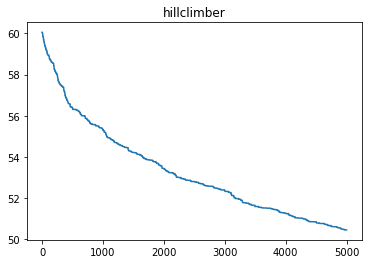

In [3]:
from Code.algorithms import random_start_hillclimber

%time hill_df, best = random_start_hillclimber(joined, all_households, rel_poi_df, df_afstandn2, clean=False, prompt=False)